# <center>Churn Analysis and Customer Retention Strategies for a Telecommunication Company</center>

##  Business Understanding

### Background
The telecommunication industry is highly competitive, with companies vying for customers' attention and loyalty. One of the significant challenges faced by telecommunication companies is customer churn, which refers to the rate at which customers stop using their services and switch to competitors. Customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analyzing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

###  Business Objective
The primary objective of this churn analysis project is to help the telecommunication company reduce customer churn and enhance customer retention through data-driven insights and predictive modeling to ultimately achieve higher revenue and profitability.

###  Hypothesis

**Null Hypothesis (H0):** The Monthly Charges, Total charges and tenure do not have significant impact on the Churn rate.
 
**Alternative Hypothesis (H1):** The Monthly Charges, Total charges and tenure significantly impact the Churn rate. 


 ### Questions
1.	Which gender exhibited the highest churn?
2.	Is there a significant association between gender and churn?
3.	Does the presence of dependents affect customer churn? 
4.	Which gender pays more monthly charges? 
5.	Does the presence of dependents affect monthly charges?
6.	Do paperless billing and payment methods influence churn?  
7.	Is there a correlation between senior citizens and churn?


### Install required packages


In [1]:
#Libraries for sql
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#libraries for visulation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
offline.init_notebook_mode(connected=True) # Configure Plotly to run 
import statsmodels.api as sm
from scipy.stats import chi2_contingency

#Feature processing libraries
from sklearn.impute import SimpleImputer
#import phix
from phik import phik_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

#pipelines and transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

#model evaluation
from sklearn.metrics import classification_report,fbeta_score,make_scorer
from sklearn.metrics import confusion_matrix


### Create a connection by accessing connection string with defined environment variables


In [2]:
# Load environment variables from .env file into a dictionary
#environment_variables = dotenv_values('.env')


In [3]:
# Get the values for the credentials you set in the '.env' file
'''database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"'''


'database = environment_variables.get("DATABASE")\nserver = environment_variables.get("SERVER")\nusername = environment_variables.get("USERNAME")\npassword = environment_variables.get("PASSWORD")\n\nconnection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"'

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
#connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below. 
#query = "Select * from dbo.LP2_Telco_churn_first_3000"


## Data Understanding



###  Resources availability 
Data for this project

In this project, the dataset resides in 3 places. For ease of access and security we have made the datasets available there in the GitHub Repository 

- First Data Set

The data called LP2_Telco_churn_First_3000 was extracted from a database.

- Second Data Set

The data called Telco-churn-second-2000.xlsx was found in OneDrive which is our test dataset

- Third Data Set

The third part of the data called LP2_Telco-churn-last-2000.csv. is hosted on a GitHub Repository 


###  Column names and description
**Gender** -- Whether the customer is a male or a female

**SeniorCitizen** -- Whether a customer is a senior citizen or not

**Partner** -- Whether the customer has a partner or not (Yes, No)

**Dependents** -- Whether the customer has dependents or not (Yes, No)

**Tenure** -- Number of months the customer has stayed with the company

**Phone Service** -- Whether the customer has a phone service or not
(Yes, No)

**MultipleLines** -- Whether the customer has multiple lines or not

**InternetService** -- Customer's internet service provider (DSL, Fiber
Optic, No)

**OnlineSecurity** -- Whether the customer has online security or not
(Yes, No, No Internet)

**OnlineBackup** -- Whether the customer has online backup or not (Yes,
No, No Internet)

**DeviceProtection** -- Whether the customer has device protection or
not (Yes, No, No internet service)

**TechSupport** -- Whether the customer has tech support or not (Yes,
No, No internet)

**StreamingTV** -- Whether the customer has streaming TV or not (Yes,
No, No internet service)

**StreamingMovies** -- Whether the customer has streaming movies or not
(Yes, No, No Internet service)

**Contract** -- The contract term of the customer (Month-to-Month, One
year, Two year)

**PaperlessBilling** -- Whether the customer has paperless billing or
not (Yes, No)

**Payment Method** -- The customer's payment method (Electronic check,
mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges** -- The amount charged to the customer monthly

**TotalCharges** -- The total amount charged to the customer

**Churn** -- Whether the customer churned or not (Yes or No)


### Data Loading

In [6]:
data=pd.read_csv(r"C:\Users\eMARS COMPUTERS\Desktop\raheemah\LP2_Telco_churn_First_3000.csv")
data1=pd.read_csv(r"C:\Users\eMARS COMPUTERS\Desktop\raheemah\LP2_Telco-churn-last-2000.csv")
test_set=pd.read_excel(r"C:\Users\eMARS COMPUTERS\Desktop\raheemah\Telco-churn-second-2000.xlsx")

In [7]:
#we will put convert the dataset in the database to csv
#data.to_csv("LP2_Telco_churn_First_3000.csv")

## Exploratory Data Analysis
Here we will analyze and investigate data sets and summarize their characteristics by using data visualization,
also since we will concatenate all the data sets we will use for training 

### EDA On Telco Churn 3000

In [8]:
#view the data set
data.head()

Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0  7590-VHVEG  Female          False     True       False       1   
1           1  5575-GNVDE    Male          False    False       False      34   
2           2  3668-QPYBK    Male          False    False       False       2   
3           3  7795-CFOCW    Male          False    False       False      45   
4           4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0         False           NaN             DSL  ...            False   
1          True         False             DSL  ...             True   
2          True         False             DSL  ...            False   
3         False           NaN             DSL  ...             True   
4          True         False     Fiber optic  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  
0           Electronic check       29.850000    29.850000  False  
1               Mailed check       56.950001  1889.500000  False  
2               Mailed check       53.849998   108.150002   True  
3  Bank transfer (automatic)       42.299999  1840.750000  False  
4           Electronic check       70.699997   151.649994   True  

[5 rows x 22 columns]

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
#we will put convert the dataset in the database to csv
#data.to_csv("LP2_Telco_churn_First_3000.csv")

In [11]:
#check for duplicated values
data.duplicated().sum()


0

In [12]:
#General info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [13]:
#check the number of rows and columns
data.shape

(3000, 21)

In [14]:
#view number of missing values
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Notes on data (Telco churn First 3000)
* We have a total of 3000 rows
* We have a total of 21 columns
* Our target variable has true/false attributes, therefore it is a binary classification problem
* Online Security,Online Backup,Device Protection,tech support,streaming tv,streaming movies all have 651 missing values and multiple lines has 269 missing values
* There are no duplicated values

### EDA On Telco Churn last 2000

In [15]:
#view data set
data1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes          No              No  Month-to-month              Yes   
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [16]:
#check for duplicated values
data1.duplicated().sum()

0

In [17]:
#General info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [18]:
#check number of rows and columns
data1.shape

(2043, 21)

In [19]:
#check number of missing values
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Notes on Telco Churn last 2000
* We have a total of 2043 rows
* We have a total of 21 columns
* Our target variable has yes/no attributes, therefore it is a binary classification problem
* The TotalCharges column is an object data type, so we will check that.
* There are no missing values
* There are no duplicated values

##### We observed that the dataset which is the telco churn 3000 has a lot of missing values so we will like to check the percentage of the columns that had missing values to observe whether it is relevant to our dataset

In [20]:
# # Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100


In [21]:
# Filter the columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]


In [22]:
#view mising columns
columns_with_missing

MultipleLines        8.966667
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [23]:
# Display the missing percentage for columns with missing values
fig = go.Figure()
fig.add_trace(go.Bar(x=columns_with_missing.index, y=columns_with_missing.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Percentage of Missing Values in Columns', xaxis_title='Columns', yaxis_title='Percentage')

# Display the plot
fig.show()


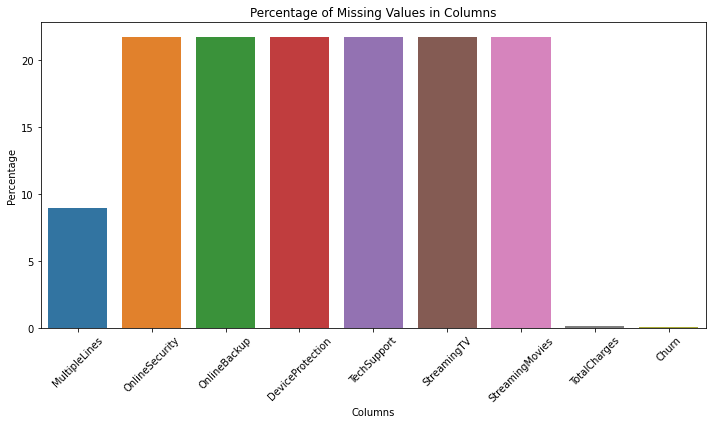

In [24]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter the columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0]

# Create a bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=columns_with_missing.index, y=columns_with_missing.values)

# Set the title and labels
plt.title('Percentage of Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## Notes

##### After checking the percentage we observed that about 6 columns have 21.7% of data missing whiles others like Multiplelines,total charges and churn have 8.97%,0.167% and 0.03 respectively.These percentages show that the missing values in these columns can be removed but to maintain more data for our model to train we will explore further to determine how to handle the missing values

The dataset telco churn last 2000 has no missing values therefore we wanted to explore if that dataset can help in a way to impute the missing values in telco churn first 3000

In [25]:
#put all missing values in a variable
missing=data.isnull().any()


In [26]:
#we exclude missing values that are zero
missing = missing[missing]

In [27]:
# Compare unique values in columns with missing values to corresponding columns in data1
for col in missing.index:
    if col not in ["TotalCharges", "Churn"]:
        print(f"Unique values in {col} column of first dataset:\n{data[col].unique()}")
        print(f"Unique values in {col} column of second dataset:\n{data1[col].unique()}")
        print("-------------------------------------")


Unique values in MultipleLines column of first dataset:
[nan False True]
Unique values in MultipleLines column of second dataset:
['No' 'No phone service' 'Yes']
-------------------------------------
Unique values in OnlineSecurity column of first dataset:
[False True nan]
Unique values in OnlineSecurity column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in OnlineBackup column of first dataset:
[True False nan]
Unique values in OnlineBackup column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in DeviceProtection column of first dataset:
[False True nan]
Unique values in DeviceProtection column of second dataset:
['No' 'Yes' 'No internet service']
-------------------------------------
Unique values in TechSupport column of first dataset:
[False True nan]
Unique values in TechSupport column of second dataset:
['Yes' 'No' 'No internet service']
------------------------

## Notes
After comparing the unique values between the two datasets,we noticed:
* For multiplelines values, the first dataset contained True,False,None and the second conatined Yes,No,No Phone service.Therefore we assume the missing values for the Multiplelines in the first dataset will also be imputed with No phone service as seen in the second dataset
* For OnlineSecurity values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineSecurity in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For OnlineBackup values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the OnlineBackup in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For DeviceProtection values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the DeviceProtection in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For TechSupport values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the Techsupport in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingTV values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingTV in the first dataset will also be imputed with No Internet service as seen in the second dataset
* For StreamingMovies values, the first dataset contained True,False,None and the second conatined Yes,No,No Internet service.Therefore we assume the missing values for the StreamingMovies in the first dataset will also be imputed with No Internet service as seen in the second dataset

#### After determing how the missing values will be imputed we will concatenate  the dataset from the database(Telco churn first 3000) and the data from  the github repository(Teleco churn last 2000)

In [28]:
## concatenation
Telco_churn=pd.concat([data,data1],ignore_index=True)

In [29]:
##### Note this dataset will be used for training and eval

In [30]:
#view telco churn
Telco_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           NaN             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3           NaN             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000         29.85  False  
1               Mailed check      56.950001        1889.5  False  
2               Mailed check      53.849998    108.150002   True  
3  Bank transfer (automatic)      42.299999       1840.75  False  
4           Electronic check      70.699997    151.649994   True  

[5 rows x 21 columns]

In [31]:
#general summary info
Telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


### Converting the totalcharges column to a numerical variable
From .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was in numeric  there we will be chaning it to a numeric data type

In [32]:
#convert it to numerical
Telco_churn["TotalCharges"]= pd.to_numeric(Telco_churn["TotalCharges"], errors="coerce")

In [33]:
#check datatype of totalcharges
Telco_churn["TotalCharges"].dtype

dtype('float64')

##### Before concatenating both datasets,the dataset telco churn 3000 contained true,false values and the other yes or no.Therefore most columns in the concatenated dataset contain yes and no and true or false so to ensure uniformity we will choose one.The reason we are choosing  yes or no is that from our data understanding we observed the values needed to be present in the dataset are yes or no

In [34]:
#replace all true or false in the dataset to yes or no
Telco_churn.replace({True: "Yes", False: "No"}, inplace=True)

In [35]:
#view dataset after changes
Telco_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           NaN             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3           NaN             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000     29.850000     No  
1               Mailed check      56.950001   1889.500000     No  
2               Mailed check      53.849998    108.150002    Yes  
3  Bank transfer (automatic)      42.299999   1840.750000     No  
4           Electronic check      70.699997    151.649994    Yes  

[5 rows x 21 columns]

### Cleaning test dataset

In [36]:
#view test data
test_set.head()

customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes     Fiber optic                   No                   No   
1            No              No  No internet service  No internet service   
2            No             DSL                  Yes                   No   
3           Yes     Fiber optic                   No                   No   
4            No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                   No  Month-to-month              Yes  Electronic check   
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges TotalCharges  
0           84.45      1059.55  
1           20.40        181.8  
2           81.70      2212.55  
3           79.50      2180.55  
4           89.15        89.15

In [37]:
## general info
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


### Converting the totalcharges column to a numerical variable


From .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was in numeric  there we will be chaning it to a numeric data type


In [38]:
#convert it to numerical
test_set["TotalCharges"]= pd.to_numeric(test_set["TotalCharges"], errors="coerce")


In [39]:
#check datatype of totalcharges
test_set["TotalCharges"].dtype

dtype('float64')

In [40]:
### replace 0 and 1 in senior citizen column to yes and no
test_set["SeniorCitizen"]=test_set["SeniorCitizen"].replace({1: "Yes", 0: "No"})


In [41]:
#view test set after changes
test_set.head()

customerID gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male            No      No         No      12          Yes   
1  4568-TTZRT   Male            No      No         No       9          Yes   
2  9513-DXHDA   Male            No      No         No      27          Yes   
3  2640-PMGFL   Male            No      No        Yes      27          Yes   
4  3801-HMYNL   Male            No     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes     Fiber optic                   No                   No   
1            No              No  No internet service  No internet service   
2            No             DSL                  Yes                   No   
3           Yes     Fiber optic                   No                   No   
4            No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                   No  Month-to-month              Yes  Electronic check   
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges  TotalCharges  
0           84.45       1059.55  
1           20.40        181.80  
2           81.70       2212.55  
3           79.50       2180.55  
4           89.15         89.15

### Handling Missing Values

In [42]:
#before we impute the missing values we want to check the number of missing values in each column for main data we will use for training and eval
Telco_churn.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [43]:
## check number of missing values in test data
test_set.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

## Imputing missing values in Total charges column

#### We want to visualise the Total Charges Column to determine which method we will use to impute the missing values

In [44]:
#Create a box plot for the "TotalCharges" column
fig = go.Figure()
fig.add_trace(go.Box(y=Telco_churn["TotalCharges"], name="TotalCharges",marker=dict(color='darkblue')))

# Update layout
fig.update_layout(title='Box Plot of TotalCharges', yaxis_title='TotalCharges')

# Display the plot
fig.show()


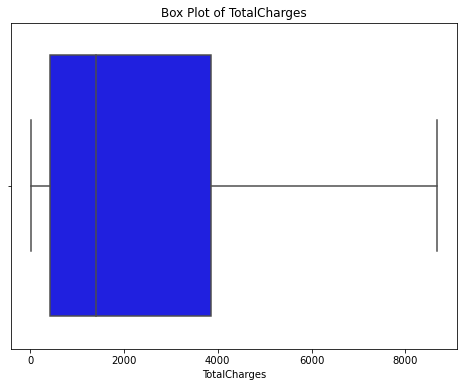

In [45]:
# Create a box plot 
plt.figure(figsize=(8, 6))
sns.boxplot(x=Telco_churn["TotalCharges"], color='blue')

# Set the title and labels
plt.title('Box Plot of TotalCharges')
plt.xlabel('TotalCharges')

# Show the plot
plt.show()

#### From the boxplot you can tell there is no outlier therefore the missing values will be imputed with mean since mean is sensitive to outliers


In [46]:
#we create a variable to contain our amount column so it will be easier to impute the missing values
num_cols=["TotalCharges"]

In [47]:
#Create the SimpleImputer object and fit it to the data
impute=SimpleImputer(strategy="mean").fit(Telco_churn[num_cols])

In [48]:
# Transform the data to impute missing values
imputed_data = impute.transform(Telco_churn[num_cols])


In [49]:
# Convert the imputed data back to a DataFrame with the original columns
imputed_df = pd.DataFrame(imputed_data, columns=num_cols)


In [50]:
# Update the main dataframe with the imputed values
Telco_churn[num_cols] = imputed_df

In [51]:
#view missing value in total charges column to check if missing values still exist
Telco_churn["TotalCharges"].isnull().sum()

0

In [52]:
## this same procedure will be done for the test data since there are no outliers we impute with mean

In [53]:
#we create a variable to contain our amount column so it will be easier to impute the missing values
num_=["TotalCharges"]


In [54]:
#Create the SimpleImputer object and fit it to the data
imputer=SimpleImputer(strategy="mean").fit(test_set[num_])


In [55]:
# Transform the data to impute missing values
impute_data = imputer.transform(test_set[num_])


In [56]:

# Convert the imputed data back to a DataFrame with the original columns
impute_df = pd.DataFrame(impute_data, columns=num_)


In [57]:

# Update the main dataframe with the imputed values
test_set[num_] = impute_df


In [58]:
#view missing value in total charges column to check if missing values still exist
test_set["TotalCharges"].isnull().sum()


0

## Imputing missing values in Churn column

In [59]:
#view number of missing values in churn column
Telco_churn["Churn"].isnull().sum()

1

In [60]:
#we view churn colums
Telco_churn["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
5       Yes
6        No
7        No
8       Yes
9        No
10       No
11       No
12       No
13      Yes
14       No
15       No
16       No
17       No
18      Yes
19       No
20      Yes
21       No
22      Yes
23       No
24       No
25       No
26      Yes
27      Yes
28       No
29      Yes
30       No
31       No
32       No
33       No
34       No
35       No
36      Yes
37       No
38      Yes
39      Yes
40       No
41       No
42       No
43       No
44       No
45       No
46       No
47      Yes
48       No
49       No
50       No
51      Yes
52       No
53      Yes
54       No
55      Yes
56       No
57       No
58       No
59       No
60       No
61       No
62       No
63       No
64      Yes
65       No
66       No
67       No
68       No
69       No
70       No
71       No
72       No
73       No
74       No
75       No
76       No
77       No
78       No
79       No
80      Yes
81       No
82      Yes
83  

#### After viewing the churn column and realising it has only one missing value we decided to fill it with the most occuring

In [61]:
# Calculate the mode of the "Churn" column
churn_mode = Telco_churn["Churn"].mode()


In [62]:
# Count the occurrences of each value in the "Churn" column
churn_counts = Telco_churn["Churn"].value_counts()


In [63]:
# Create a bar plot to visualize the counts
fig = go.Figure(go.Bar(x=churn_counts.index, y=churn_counts.values, marker=dict(color='darkblue')))

# Update layout 
fig.update_layout(title='Churn Mode and Counts', xaxis_title='Churn', yaxis_title='Counts')

# Display the plot
fig.show()

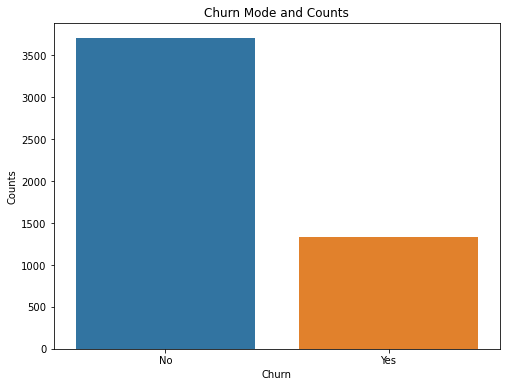

In [64]:
# Calculate the mode of the "Churn" column
churn_mode = Telco_churn["Churn"].mode()

# Count the occurrences of each value in the "Churn" column
churn_counts = Telco_churn["Churn"].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Set the title and labels
plt.title('Churn Mode and Counts')
plt.xlabel('Churn')
plt.ylabel('Counts')

# Display the plot
plt.show()

#### From our visual you can see No appears the most with 3706 therefore we will replace the missing value in the churn column will be filled with mode

In [65]:
#fill with mode
Telco_churn["Churn"].fillna("No",inplace=True)

In [66]:
##check churn column to see if changes were made
Telco_churn["Churn"].isnull().sum()

0

#### Imputing missing values in multiple lines,online security,online backup,device protection,tech support,streaming movies,streaming tv columns

In [67]:
# Calculate the number of missing values in each column
missing_values = Telco_churn.isnull().sum()

In [68]:
# Filter the columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
dtype: int64


#### From our eda we deduced that MultipleLines will be imputed with no phone service and Online Security,Online Backup,Device  Protection,TechSupport StreamingTV,StreamingMovies will all be imputed with no internet service

In [69]:
#replacing the missing values of the reamining columns
Telco_churn["MultipleLines"].fillna("No phone service",inplace=True)
Telco_churn["OnlineSecurity"].fillna("No internet service",inplace=True)
Telco_churn["OnlineBackup"].fillna("No internet service",inplace=True)
Telco_churn["DeviceProtection"].fillna("No internet service",inplace=True)
Telco_churn["TechSupport"].fillna("No internet service",inplace=True)
Telco_churn["StreamingMovies"].fillna("No internet service",inplace=True)
Telco_churn["StreamingTV"].fillna("No internet service",inplace=True)

In [70]:
#check missing values in the dataset
Telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
## check missing vallues in test data
test_set.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

### There are no missing values in the training and eval dataset and also test dataset

In [72]:
#We will like to drop our ID column for our dataset since it composes of unique values
Telco_churn= Telco_churn.drop("customerID", axis= 1)
test_set=test_set.drop("customerID",axis=1)

In [73]:
### I am saving it so that I can use it for power BI
Telco_churn.to_csv(r"C:\Users\eMARS COMPUTERS\Desktop\raheemah\Churn_Analysis.csv")

In [74]:
### i am saving the clean test data to csv
test_set.to_csv(r"C:\Users\eMARS COMPUTERS\Desktop\raheemah\Clean_test_data.csv")

## Univariate Analysis 

### Describing The Data

In [75]:
Telco_churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5043.000000  5043.000000     5043.000000   5043.000000
mean        0.162403    32.576641       65.090214   2302.062861
std         0.368857    24.529807       30.068133   2267.682399
min         0.000000     0.000000       18.400000     18.799999
25%         0.000000     9.000000       35.775000    418.000000
50%         0.000000    29.000000       70.550003   1406.000000
75%         0.000000    56.000000       90.050003   3857.575073
max         1.000000    72.000000      118.650002   8670.100000

### Notes on the .describe()
#### Tenure
* This variable represents the number of months the customer has been with the company
* The output shows that on average a customer 32.57 months with the company but it has a high standard deviation of 24.53 months which indicates greater variability in customer tenures.
* The output shows the maximum amount of months a customer stays with comapny is 72
* 75% of customers spend 56 or lower months with the company

#### Monthly Charges
* This variable represents the amount charged to the customer monthly.
* The output shows that averagely a customer is charged 65.09 per month with 75% paying 90.05 or lower
* A standard deviation of 30.07 in this case indicates greater variability in total charges. 

#### Total Charges
* This variable represents the total amount charged to the customer
* The average total charge across all customers, which is approximately 2302.06,whiles 75% of customers have a total charge of 3857.58 or lower.
* Has a  large stanadrd deviation of 2267.68 which indicates greater variability in total charges.



array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

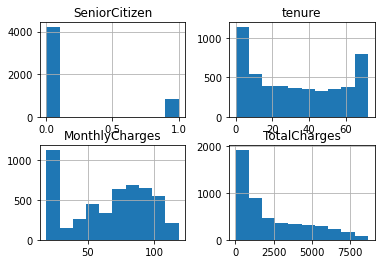

In [76]:
Telco_churn.hist(bins=10)

### Observations
* Most customers stay on the network for zero months
* Most customers that are charged 25 per month are the highest
* For customers that have zero total charges have the highest frequency.



## Univariate analysis for churn column

In [77]:
fig = make_subplots(rows=3, cols=3, subplot_titles=[
    'Monthly charges', 'Total charges', 'Count of Online Security',
    'Count of Online Backup', 'Count of MultipleLines','Count of Device Protection',
    'Count of TechSupport', 'Count of StreamingTV', 'Count of streamingMovies']
)

In [78]:

# Create a subplot grid
fig = sp.make_subplots(rows=3, cols=3, shared_xaxes=False, shared_yaxes=False,
                       horizontal_spacing=0.1, vertical_spacing=0.1)

# Create a histogram subplot for Monthly Charges
trace1 = px.histogram(Telco_churn, x="MonthlyCharges", color="Churn", nbins=20,
                      labels={"MonthlyCharges": "Monthly Charges", "Churn": "Churn"})

# Create a histogram subplot for Total Charges
trace2 = px.histogram(Telco_churn, x="TotalCharges", color="Churn", nbins=20,
                      labels={"TotalCharges": "Total Charges", "Churn": "Churn"})

# Count of Online Security with respect to Churn
count_df = Telco_churn.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")
trace3 = px.bar(count_df, x="OnlineSecurity", y="Count", color="Churn",
                labels={"OnlineSecurity": "Online Security", "Count": "Count", "Churn": "Churn"})

# Count of Online Backup with respect to Churn
count_df = Telco_churn.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")
trace4 = px.bar(count_df, x="OnlineBackup", y="Count", color="Churn",
             title="Count of Online Backup with respect to Churn",
             labels={"OnlineBackup": "Online Backup", "Count": "Count", "Churn": "Churn"})

# Count of MultipleLines with respect to Churn
count_df = Telco_churn.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")
trace5 = px.bar(count_df, x="MultipleLines", y="Count", color="Churn",
             title="Count of Multiple Lines with respect to Churn",
             labels={"MultipleLines": "Multiple Lines", "Count": "Count", "Churn": "Churn"})

# Count of Device Protection with respect to Churn
count_df = Telco_churn.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")
trace6 = px.bar(count_df, x="DeviceProtection", y="Count", color="Churn",
             title="Count of Device Protection with respect to Churn",
             labels={"DeviceProtection": "Device Protection", "Count": "Count", "Churn": "Churn"})


# Count of MultipleLines with respect to Churn
count_df = Telco_churn.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")
trace7 = px.bar(count_df, x="TechSupport", y="Count", color="Churn",
             title="Count of Tech Support with respect to Churn",
             labels={"TechSupport": "Tech Support", "Count": "Count", "Churn": "Churn"})

# Count of StreamingTV with respect to Churn
count_df = Telco_churn.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")
trace8= px.bar(count_df, x="StreamingTV", y="Count", color="Churn",
             title="Count of Streaming Tv with respect to Churn",
             labels={"StreamingTV": "Streaming Tv", "Count": "Count", "Churn": "Churn"})

# Count of StreamingMovies with respect to Churn
count_df = Telco_churn.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")
trace9= px.bar(count_df, x="StreamingMovies", y="Count", color="Churn",
             title="Count of Streaming Movies with respect to Churn",
             labels={"StreamingMovies": "Streaming Movies", "Count": "Count", "Churn": "Churn"})


# Add traces to the subplot grid
fig.add_trace(trace1.data[0], row=1, col=1)
fig.add_trace(trace2.data[0], row=1, col=2)
fig.add_trace(trace3.data[0], row=1, col=3)
fig.add_trace(trace4.data[0], row=2, col=1)
fig.add_trace(trace5.data[0], row=2, col=2)
fig.add_trace(trace6.data[0], row=2, col=3)
fig.add_trace(trace7.data[0], row=3, col=1)
fig.add_trace(trace8.data[0], row=3, col=2)
fig.add_trace(trace9.data[0], row=3, col=3)



# Update subplot layout
fig.update_layout(title_text="Univariate Analysis On Churn Column", height=800)

# Show the subplot
fig.show()


In [79]:
# Create a pie chart 
fig = px.pie(Telco_churn, names="Churn", title='Churn Chart')

# Display the plot
fig.show()

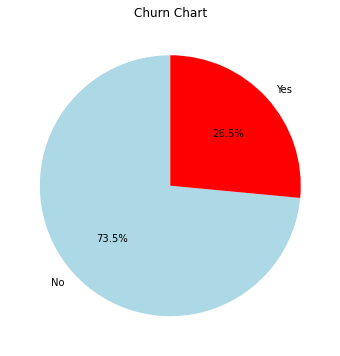

In [80]:

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
churn_counts = Telco_churn["Churn"].value_counts()
#sns.set_palette("Set1")
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Churn Chart')

# Display the plot
plt.show()


#### Notes
* We can see there is an imbalance in our dataset
* 73.5% of the  customers are still loyal
* 26.5% of the customers in the current dataset have left the company 


## Monthly charge against churn

In [81]:
#Create a histogram 
fig = px.histogram(Telco_churn, x="MonthlyCharges", color="Churn", nbins=20,
                   title="Distribution of Monthly Charges by Churn",
                   labels={"Monthly Charges": "Monthly Charges", "Churn": "Churn"})

# Display the plot
fig.show()

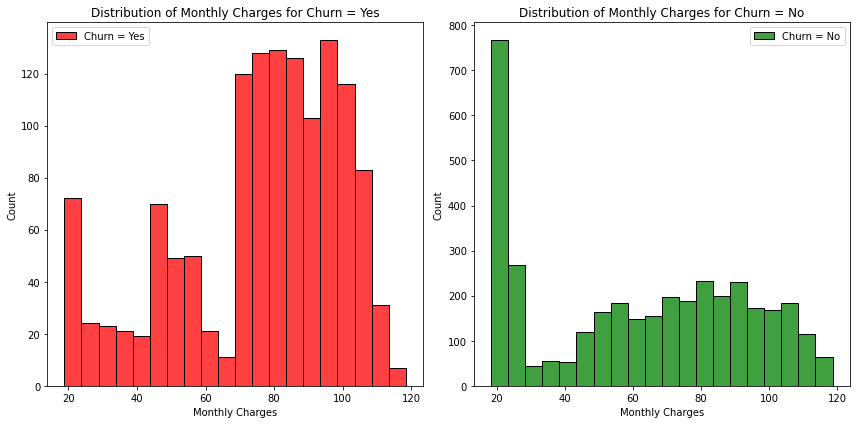

In [82]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histograms for Churn = Yes and Churn = No
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "Yes"], x="MonthlyCharges", bins=20, ax=axes[0], color="red", label="Churn = Yes")
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "No"], x="MonthlyCharges", bins=20, ax=axes[1], color="green", label="Churn = No")

# Add labels and title to each subplot
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Monthly Charges for Churn = Yes")
axes[0].legend()

axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Monthly Charges for Churn = No")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Notes
From the visual you can see the customers who churned the most paid a monthly charge between 70-110 and those that did not churn were charged 20


### Univaraiate Analysis of colums that have values imputed

## Total Charges against Churn


In [83]:
# Create a histogram 
fig = px.histogram(Telco_churn, x="TotalCharges", color="Churn", nbins=20,
                   title="Distribution of Total Charges by Churn",
                   labels={"TotalCharges": "Total Charges", "Churn": "Churn"})
# Display the plot
fig.show()

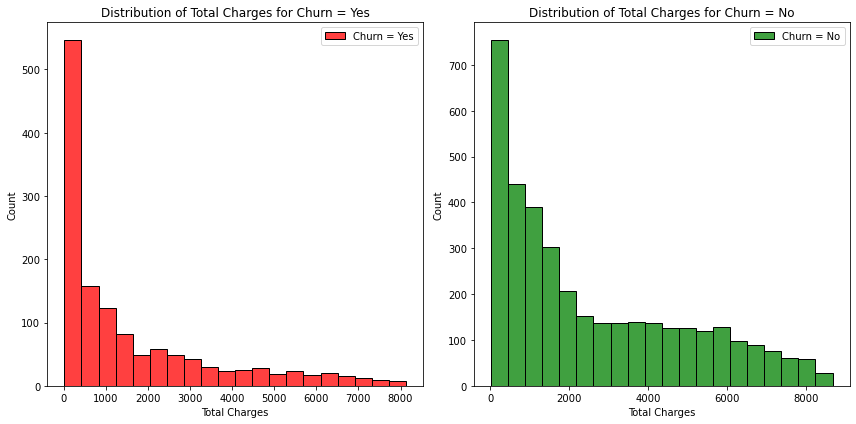

In [84]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histograms for Churn = Yes and Churn = No
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "Yes"], x="TotalCharges", bins=20, ax=axes[0], color="red", label="Churn = Yes")
sns.histplot(data=Telco_churn[Telco_churn["Churn"] == "No"], x="TotalCharges", bins=20, ax=axes[1], color="green", label="Churn = No")

# Add labels and title to each subplot
axes[0].set_xlabel("Total Charges")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Total Charges for Churn = Yes")
axes[0].legend()

axes[1].set_xlabel("Total Charges")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Total Charges for Churn = No")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Notes
- It can be seen from the image above that the most loyal customers pay a total charge between 0 and 2000. 
- Similarly, most churners paid a total charge between 0 and 2000.

## Online Security Against Churn

In [85]:
# Create a DataFrame for the count of "OnlineSecurity" against "Churn"
count_df = Telco_churn.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="OnlineSecurity", y="Count", color="Churn",
             title="Count of Online Security with respect to Churn",
             labels={"OnlineSecurity": "Online Security", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


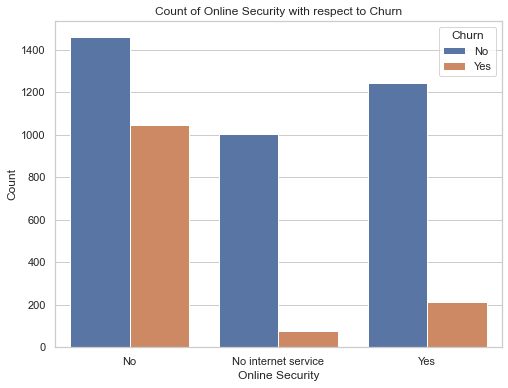

In [86]:
# Create a DataFrame for the count of "OnlineSecurity" against "Churn"
count_df = Telco_churn.groupby(["OnlineSecurity", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="OnlineSecurity", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.title("Count of Online Security with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()


## Notes
* Customers with No Online Security churned the most
* From the visual customers with no internet service churned the least showing that customers are more interested with the online security

## Online Backup Against Churn

In [87]:
# Create a DataFrame for the count of "OnlineBackup" against "Churn"
count_df = Telco_churn.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="OnlineBackup", y="Count", color="Churn",
             title="Count of Online Backup with respect to Churn",
             labels={"OnlineBackup": "Online Backup", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


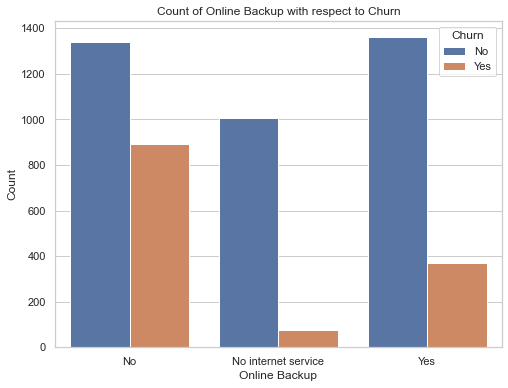

In [88]:
# Create a DataFrame for the count of "OnlineBackup" against "Churn"
count_df = Telco_churn.groupby(["OnlineBackup", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="OnlineBackup", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.title("Count of Online Backup with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customers with no OnlineBackup churned the most
* Customers that didn't have access to internet services to use online backup churned the least

## Multiple lines against Churn

In [89]:
# Create a DataFrame for the count of "MultipleLines" against "Churn"
count_df = Telco_churn.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="MultipleLines", y="Count", color="Churn",
             title="Count of Multiple Lines with respect to Churn",
             labels={"MultipleLines": "Multiple Lines", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


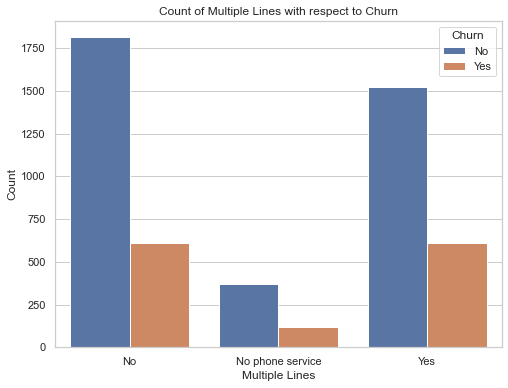

In [90]:
# Create a DataFrame for the count of "MultipleLines" against "Churn"
count_df = Telco_churn.groupby(["MultipleLines", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="MultipleLines", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.title("Count of Multiple Lines with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* For multiple lines the customers that churned had and did not have phone service are almost the same

## Device Protection Against Churn


In [91]:
# Create a DataFrame for the count of "DeviceProtection" against "Churn"
count_df = Telco_churn.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="DeviceProtection", y="Count", color="Churn",
             title="Count of Device Protection with respect to Churn",
             labels={"DeviceProtection": "Device Protection", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


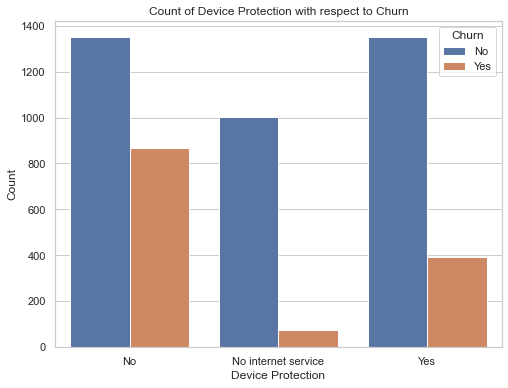

In [92]:
# Create a DataFrame for the count of "DeviceProtection" against "Churn"
count_df = Telco_churn.groupby(["DeviceProtection", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="DeviceProtection", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.title("Count of Device Protection with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customers with no device protection and device protection are the most loyal
* Customers with no device protection churned the most

## Tech Support Against Churn

In [93]:
# Create a DataFrame for the count of "TechSupport" against "Churn"
count_df = Telco_churn.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="TechSupport", y="Count", color="Churn",
             title="Count of Tech Support with respect to Churn",
             labels={"TechSupport": "Tech Support", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


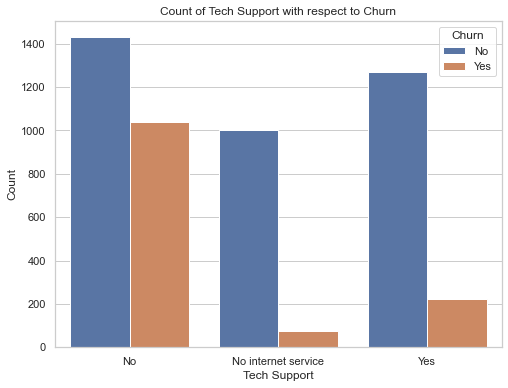

In [94]:
# Create a DataFrame for the count of "TechSupport" against "Churn"
count_df = Telco_churn.groupby(["TechSupport", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="TechSupport", y="Count", hue="Churn")#, palette="pastel")

# Set labels and title
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.title("Count of Tech Support with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Most churn came from customers with no tech support

## StreamingTv Against Churn

In [95]:
# Create a DataFrame for the count of "StreamingTV" against "Churn"
count_df = Telco_churn.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="StreamingTV", y="Count", color="Churn",
             title="Count of Streaming Tv with respect to Churn",
             labels={"StreamingTV": "Streaming Tv", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


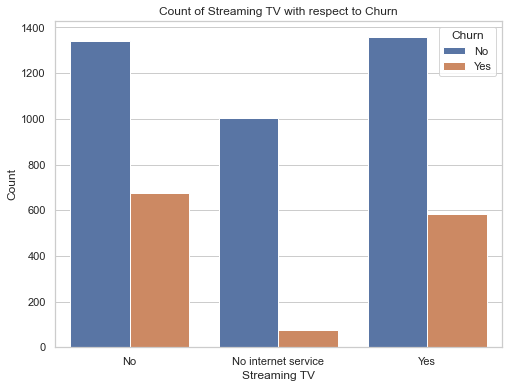

In [96]:
# Create a DataFrame for the count of "StreamingTV" against "Churn"
count_df = Telco_churn.groupby(["StreamingTV", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="StreamingTV", y="Count", hue="Churn")#, palette="Set1")

# Set labels and title
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.title("Count of Streaming TV with respect to Churn")


# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* The most loyal customers had streaming tv 
* Customers churned with no streaming tv

## Streaming Movies Against Churn

In [97]:
# Create a DataFrame for the count of "StreamingMovies" against "Churn"
count_df = Telco_churn.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")

# Create a bar plot using Plotly Express
fig = px.bar(count_df, x="StreamingMovies", y="Count", color="Churn",
             title="Count of Streaming Movies with respect to Churn",
             labels={"StreamingMovies": "Streaming Movies", "Count": "Count", "Churn": "Churn"})

# Show the plot
fig.show()


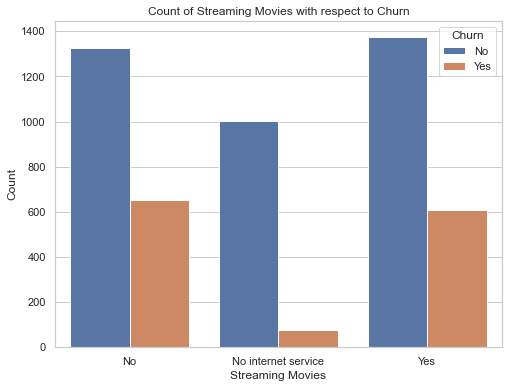

In [98]:
# Create a DataFrame for the count of "StreamingMovies" against "Churn"
count_df = Telco_churn.groupby(["StreamingMovies", "Churn"]).size().reset_index(name="Count")

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x="StreamingMovies", y="Count", hue="Churn")#, palette="Paired")

# Set labels and title
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.title("Count of Streaming Movies with respect to Churn")

# Show the plot
plt.legend(title="Churn")
plt.show()

## Notes
* Customer with no access to stream movies churned the most


# Bivariate Analysis

### Relationship between total charges and monthly charges with respect to churn

In [99]:
#We will like to see if total charges increase with Monthlycharges
fig=px.scatter(Telco_churn,x="MonthlyCharges",y="TotalCharges",color="Churn",title="Relationship Between MonthlyCharges and Total Charges With Respect to Churn")

fig.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

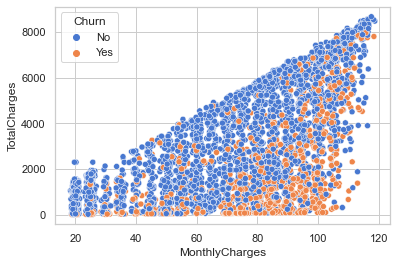

In [100]:
sns.scatterplot(data=Telco_churn,x="MonthlyCharges",hue="Churn",y="TotalCharges",palette="muted")

## Notes
* There is a positive correlation between monthly charges and total charges
* The more monthly charges a customer has the more total charges they pay.
* A monthly charge increases churn increases and when monthly charge reduces churn reduces


## Relationship Between Total Charges and Tenure With Respect to churn

In [101]:
fig=px.scatter(Telco_churn,x="tenure",y="TotalCharges",color="Churn",title="Relationship Between Total Charges and Tenure With Respect to Churn")

fig.show()

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

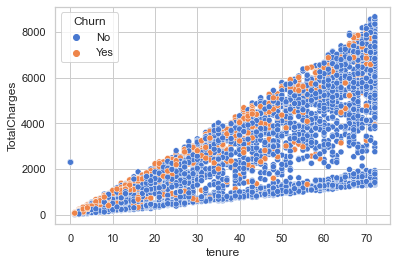

In [102]:
sns.scatterplot(data=Telco_churn,x="tenure",hue="Churn",y="TotalCharges",palette="muted")

## Notes
* Total charges and tenure are positively correlated
* As the time the customer spends at the company increases total charges increases
* As tenure increases churn decreases


## Relationship between Monthly Charges and Tenure With Respect to Churn

In [103]:
fig=px.scatter(Telco_churn,x="tenure",y="MonthlyCharges",color="Churn",title="Relationship Between Monthly Charges and Tenure With Respect to Churn")

fig.show()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

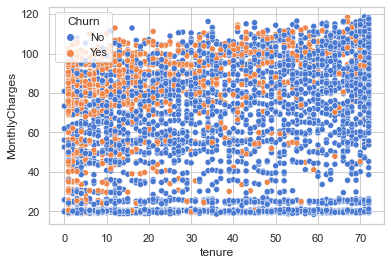

In [104]:
sns.scatterplot(data=Telco_churn,x="tenure",hue="Churn",y="MonthlyCharges",palette="muted")

## Notes
* There is no correlation

## Relationship Between Churn and TotalCharges with Respect to Contract

In [105]:
px.box(data_frame= Telco_churn, x="Churn", y= "TotalCharges", color="Contract", title= "Relationship Between Churn and TotalCharges with Respect to Contract")

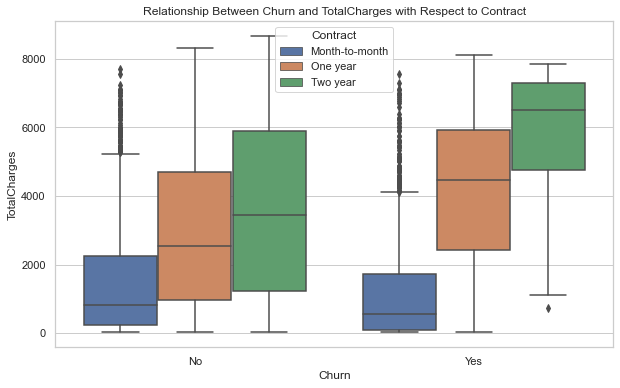

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="TotalCharges", hue="Contract")
plt.title("Relationship Between Churn and TotalCharges with Respect to Contract")
plt.show()

## Notes
* Churners pay more than non-churners

#### For No Churn:

- month-to-month customers who didn't churn are spending between 234 and 2,242. 

- Customers who are on a one-year plan and haven't churned spend  between 961 and 4692

- Customers who are on a two-year plan spend between 1218 and 5897. 


#### For Yes Churn:

-  customers who were on a month to month plan and churned spent between 98 and 1711. 

- customers who were on a one-year plan and churned spent between 2405 and 5918. 

-  customers who were on a two-year plan and churned spent spent between 4759 and 7856. 
. 


#### For Outliers:


- For the No churn,a lot of customers who are on a month-to-month plan spent more than 5222, which is far more than what the average customer from that sample is paying. 

- Similarly, a lot of churners on a month-to-month plan were spending more than 4113, which is far more than what the average customer from that sample is paying. 

- Only one customer Spent less than 740 on a 2 year plan


## Relationship Between Churn and Tenure with Respect to Contract

In [107]:
px.box(data_frame= Telco_churn, x="Churn", y= "tenure", color="Contract", title= "Relationship Between Churn and tenure with Respect to Contract")

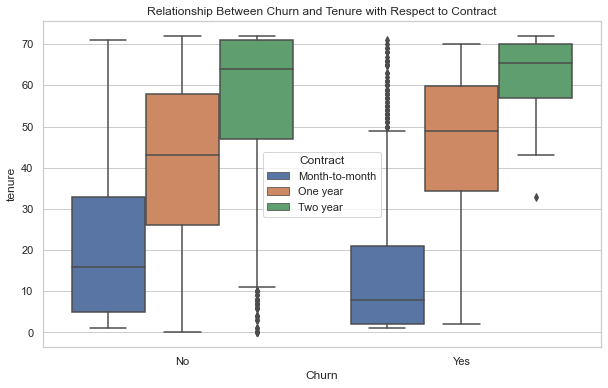

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="tenure", hue="Contract")
plt.title("Relationship Between Churn and Tenure with Respect to Contract")
plt.show()

## Notes

#### For No Churn:

- Month-to-Month customers who didn't churn currently have a tenure between 5  and 33 months with the median tenure being 16 months.

- Customers who are on a one-year plan are on their 26th to 58th month. This shows most of them have renewed their service with the company

- customers who are on a two-year plan are on thier 47th to 72th month. 


#### For Yes Churn:

- customers who were on a month to month plan and churned spent only 2 to 21 months with the company. 

- customers who were on a one-year plan and churned spent only 34 to 70 months with the company. 

- customers who were on a two-year plan and churned spent only 57 to 72 months with the company. 


#### For Outliers:


- For No Churn, quite a number of customers who were on a two year plan-- as displayed by the dots below the lower whishker-- only had a tenure between 0 and 10 months. This could mean they churned within the timeframe, but the company failed to label them as Churners or it could also mean that they have newly subscribed to the two-year plan; hence, their low tenure.

- It can also be seen that some churners who were on a month-to-month contract plans spent more than 50 months with the company before churning. 

- Only one customers considered as a churner on a two-year contract spent less than 33 months with the company. 


## Relationship Between Churn and Monthly Charges with Respect to Contract

In [109]:
px.box(data_frame= Telco_churn, x="Churn", y= "MonthlyCharges", color="Contract", title= "Relationship Between Churn and Monthly Charges with Respect to Contract")

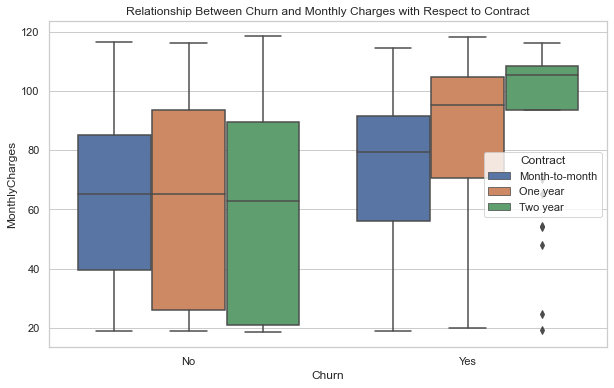

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Telco_churn, x="Churn", y="MonthlyCharges", hue="Contract")
plt.title("Relationship Between Churn and Monthly Charges with Respect to Contract")
plt.show()

## Notes
* Churners pay more monthly charges than non-churners

#### For No Churn:

- month-to-month customers who didn't churn are paying a monthly charge between 39.3 and 85.3

- Customers who are on a one-year plan and haven't churned pay a monthly charge between 26 and 93

- Customers who are on a two-year plan pay a monthly between 21 and 90 showing that the more you stay with comapny you pay less monthly charges



#### For Yes Churn:

-  customers who were on a month to month plan and churned payed a monthly charge between 56 and 92. 

- customers who were on a one-year plan and churned payed a monthly charge between 70 and 118. 

-  customers who were on a two-year plan and churned payed a monthly charge between 93 and 116. 
. 


#### For Outliers:


- Only six customer payed a monthly charge less than 93 on a 2 year plan


## Multivariate Analysis

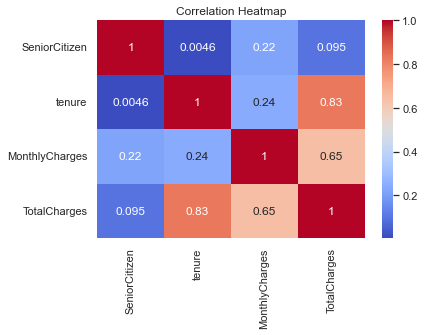

In [111]:
# Select numeric columns only
numeric_columns = Telco_churn.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Notes
* There is a high correlation between tenure and total charges and also between Monthly charges and total charges
* There is a low correlation between tenure and monthly charges

## Hypotheis Testing

**Null Hypothesis (H0):** The Monthly Charges, Total charges and tenure do not have significant impact on the Churn rate.
 
**Alternative Hypothesis (H1):** The Monthly Charges, Total charges and tenure significantly impact the Churn rate. 


In [112]:
### we will use multiple logistic regression

**Multiple Regression (Logistic Regression)**

**logistic regression** is a type of multiple regression used for predicting binary outcomes, and it is a suitable approach for analyzing the impact of multiple predictor variables (independent variables) on a binary categorical target variable (dependent variable).

In [113]:
# Create a copy of the data.This copy will be used for hypothesis testing
Telco_churn_copy = Telco_churn.copy()

In [114]:
#we put the features that we want to see whether they have impact on churn or not in a variable and do same for churn
X = Telco_churn_copy[['MonthlyCharges', 'TotalCharges', 'tenure']]
y = Telco_churn_copy['Churn']


In [115]:
# Convert the 'churn' variable to binary numeric values (0 and 1)
y = pd.get_dummies(y, drop_first=True)['Yes']


In [116]:
X = sm.add_constant(X)
# Add an intercept,the code adds a constant column to the feature matrix X. 
#This constant column is necessary for fitting a logistic regression model using the statsmodels library in Python. 
#The constant term corresponds to the intercept in the logistic regression equation.


logit_model = sm.Logit(y, X)
# Fit the logistic regression model.Here, a logistic regression model is instantiated using the Logit class from 
#the statsmodels library. y represents the binary target variable (dependent variable), 
#and X is the feature matrix containing independent variables.

result = logit_model.fit()
#fits the logistic regression model to the data. 

print(result.summary())
#prints the summary of the result

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    Yes   No. Observations:                 5043
Model:                          Logit   Df Residuals:                     5039
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                     inf
Time:                        19:51:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7064      0.139    -12.281      0.000      -1.979      -1.434
MonthlyCharges     0.0

C:\Users\eMARS COMPUTERS\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\eMARS COMPUTERS\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



The **Pseudo R-squared** value indicates the proportion of variance explained by the model. A higher value indicates a better fit.
The Pseudo R-squared is 0.2179 which is approximately 21.79% of the variation in the probability of churn based on the predictor variables included in the model.

**Coefficients:** The sign of the coefficient indicates the direction of the relationship between the predictor variable and the probability of churn. A positive coefficient suggests that an increase in the predictor variable is associated with a higher likelihood of churn, while a negative coefficient suggests the opposite.

The coefficient for 'MonthlyCharges' is 0.0314 which means that as the monthly charges increase, the likelihood of churn also increases.

The coefficient for 'TotalCharges' is 0.0001 which suggests that as the total charges increase, the likelihood of churn also increases.

The coefficient for 'tenure' is -0.0640 which indicates that as the tenure (the length of time the customer has been with the company) increases, the likelihood of churn decreases.

**P-values of Predictors**

**MonthlyCharges:** The p-value is 0.000, which is less than the significance level (0.05) which implies that Monthly Charges has a statistically significant impact on the probability (likelihood) of churn.

**TotalCharges:** The p-value is 0.097, which is greater than the significance level (0.05) which implies that Total Charges has no statistically significant impact on the probability (likelihood) of churn.

**Tenure:** The p-value is 0.000, which is less than the significance level (0.05) which means that Tenure has a statistically significant impact on the probability (likelihood) of churn.


**likelihood ratio test (LLR) p-value**

**likelihood ratio test (LLR) p-value** tests the joint significance of all the predictor variables in the model.

The LLR p-value is 3.069e-275, which is extremely lower than the sig. value (0.05). This indicates strong evidence against the null hypothesis, suggesting that the joint effect of the predictor variables on churn is statistically significant.

### A graph to visualize the joint impact of the significant predictor variables (MonthlyCharges and tenure) on the probability of churn. 

In [117]:
# Define the range of values for MonthlyCharges and tenure
monthly_charges_range = np.linspace(data['MonthlyCharges'].min(), data['MonthlyCharges'].max(), 100)
tenure_range = np.linspace(data['tenure'].min(), data['tenure'].max(), 100)


In [118]:
# Create a meshgrid of MonthlyCharges and tenure values
MonthlyCharges, tenure = np.meshgrid(monthly_charges_range, tenure_range)

# Calculate the predicted probabilities of churn for each combination of MonthlyCharges and tenure
log_odds = -1.7064 + 0.0314 * MonthlyCharges - 0.0640 * tenure
prob_churn = 1 / (1 + np.exp(-log_odds))


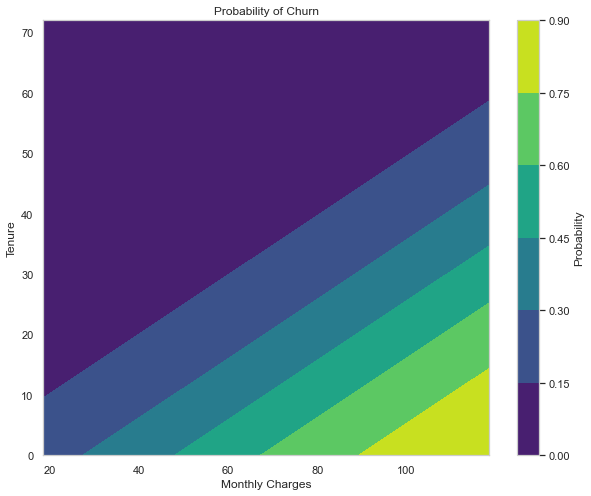

In [119]:
# Create a 2D contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(MonthlyCharges, tenure, prob_churn, cmap='viridis')

# Set axis labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Probability of Churn')

# Add a color bar for the probability scale
cbar = plt.colorbar(contour)
cbar.set_label('Probability')

# Show the plot
plt.show()


We observed the joint impact of these two variables on the likelihood of churn. The higher the tenure the lower the probability to churn. The higher the monthly charges the higher the probability to churn.

## Answering Questions

In [120]:
# Create a copy of the data.This copy will be used to answer the questions
Telco_churn_copy2 = Telco_churn.copy()

#### **Question 1:** Which gender exhibited the highest churn?

In [121]:
# Convert 'Yes' and 'No' to numeric values (1 and 0, respectively) in the 'Churn' column
Telco_churn_copy2['Churn'] = Telco_churn_copy2['Churn'].map({'Yes': 1, 'No': 0})


In [122]:
# Group the data by 'gender' and calculate the churn rate for each gender
gender_churn_rate = Telco_churn_copy2.groupby('gender')['Churn'].mean()


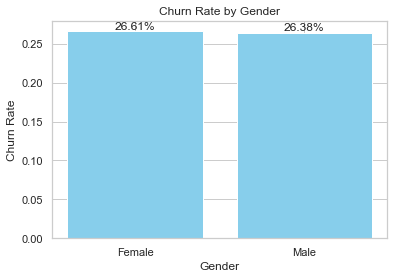

In [123]:
# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(gender_churn_rate.index, gender_churn_rate.values, color='skyblue')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')

# Add percentage labels on top of each bar
for index, value in enumerate(gender_churn_rate.values):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

The churn rate for females is approximately 26.61%, while the churn rate for males is approximately 26.38%. The churn rates for both genders are relatively close, with a slightly higher churn rate for females. 

#### **Question 2:** Is the a significant association between gender and churn?

The **Chi-Square test** can assess whether there is a significant association between the two categorical variables.

In [124]:
# Create a contingency table of 'gender' and 'Churn'
contingency_table = pd.crosstab(Telco_churn_copy2['gender'], Telco_churn_copy2['Churn'])


In [125]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


In [126]:
# Create a DataFrame for the expected frequencies table
expected_df = pd.DataFrame(expected, index=['Female', 'Male'], columns=['Churn=No', 'Churn=Yes'])


In [127]:
# Round the expected frequencies to whole numbers for better interpretation
expected_df_rounded = expected_df.round().astype(int)


In [128]:

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", '{:.4f}'.format(p_value))
print("Degrees of Freedom:", dof)

# Print the rounded expected frequencies table
print("Expected Frequencies Table:")
expected_df_rounded

Chi-Square Statistic: 0.024146708104267937
P-value: 0.8765
Degrees of Freedom: 1
Expected Frequencies Table:


Churn=No  Churn=Yes
Female      1826        658
Male        1881        678

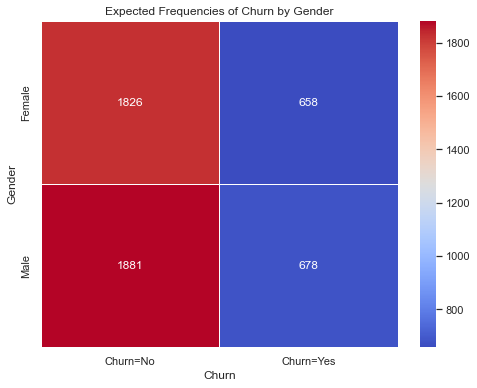

In [129]:
# Create a heatmap to visualize the expected counts
plt.figure(figsize=(8, 6))
sns.heatmap(expected_df_rounded, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.xlabel('Churn')
plt.ylabel('Gender')
plt.title('Expected Frequencies of Churn by Gender')
plt.show()

Therefore, based on this analysis, we cannot conclude that gender significantly impacts the likelihood of churn in the telecommunications company's customer base. The observed differences in churn rates between genders could very likely be due to random variability rather than a true relationship.

#### **Question 3:** Does the presence of dependents affect customer churn? 

In [130]:

# Create a contingency table of 'Dependents' and 'Churn'
contingency_table_dependents = pd.crosstab(Telco_churn_copy2['Dependents'], Telco_churn_copy2['Churn'])


In [131]:
# Perform the Chi-Square test to get the expected frequencies and other statistics
chi2_dependents, p_value_dependents, dof_dependents, expected_dependents = chi2_contingency(contingency_table_dependents)


In [132]:
# Convert the p-value to normal decimal form and round it to 4 decimal places
p_value_dependents = "{:.4f}".format(p_value_dependents)


In [133]:
# Create a DataFrame for the expected frequencies table
expected_df = pd.DataFrame(expected_dependents, index=['Dependents=Yes', 'Dependents=No'], columns=['Churn=No', 'Churn=Yes'])


In [134]:
# Print the Chi-Square test results and expected frequencies table
print("Chi-Square Statistic:", chi2_dependents)
print("P-value:", p_value_dependents)
print("Degrees of Freedom:", dof_dependents)
print("\nExpected Frequencies Table:")
print(expected_df)



Chi-Square Statistic: 147.65303980235052
P-value: 0.0000
Degrees of Freedom: 1

Expected Frequencies Table:
                   Churn=No   Churn=Yes
Dependents=Yes  2559.542733  922.457267
Dependents=No   1147.457267  413.542733


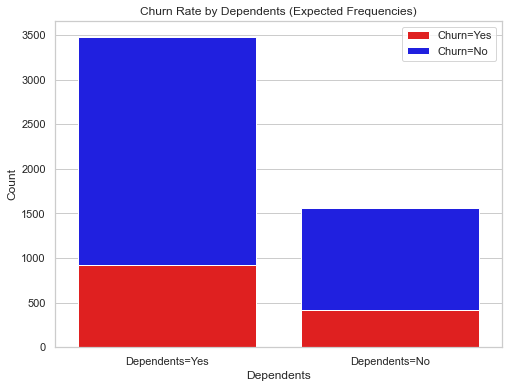

In [135]:
# Create a stacked bar plot to visualize the expected frequencies
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=expected_df.index, y=expected_df['Churn=Yes'], color='red', label='Churn=Yes')
sns.barplot(x=expected_df.index, y=expected_df['Churn=No'], color='blue', bottom=expected_df['Churn=Yes'], label='Churn=No')

# Add labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Churn Rate by Dependents (Expected Frequencies)')
plt.legend()

# Show the plot
plt.show()


The Chi-Square statistic is 147.65, indicating that there is a significant discrepancy between the observed and expected frequencies of the 'Dependents' and 'Churn' variables.  The P-value is 0.000, which is significantly smaller than the significance level of 0.05. This suggests a significant relationship between the presence or absence of dependents and customer churn. In other words, the presence of dependents does have a significant impact on customer churn in the telecommunications company.

For customers with Dependents, the expected count of churn customers is approximately 922.46, and the expected count of non-churn customers is approximately 2559.54.
For customers with no Dependents, the expected count of churn customers is approximately 413.54, and the expected count of non-churn customers is approximately 1147.46.

Customers with dependents tend to exhibit different churn behavior compared to those without dependents Therefore, understanding how customer churn behavior varies for customers with and without dependents can help in designing targeted retention strategies for each segment.

#### **Question 4:** Which gender pays more monthly charges? 

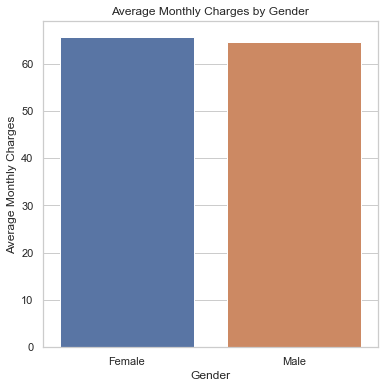

In [136]:
# Create a bar plot to compare average monthly charges for each gender
plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='MonthlyCharges', data=Telco_churn_copy2, ci=None)
plt.xlabel('Gender')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Gender')
plt.show()


Averagely, female customers tend to have a slightly higher monthly charges compared to male customers. This could be a valuable insight for the telecommunication company in understanding the spending behavior of its customer base and potentially tailoring marketing strategies or offers based on gender-specific preferences and needs. 

#### **Question 5:** Does the presence of dependents affect monthly charges?

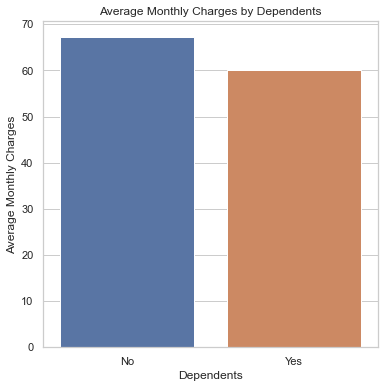

In [137]:
# Create a grouped bar plot to compare average monthly charges for customers with and without dependents
plt.figure(figsize=(6, 6))
sns.barplot(x='Dependents', y='MonthlyCharges', data=Telco_churn_copy2, ci=None)
plt.xlabel('Dependents')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Dependents')
plt.show()



On the average, customers without dependents have higher monthly charges compared to customers with dependents. This insight can be valuable for the telecommunication companies in understanding the spending behavior of different customer segments. It may help them tailor their marketing strategies or offers based on customers' family status and financial preferences.

#### **Question 6:** Do paperless billing and payment methods influence churn?  

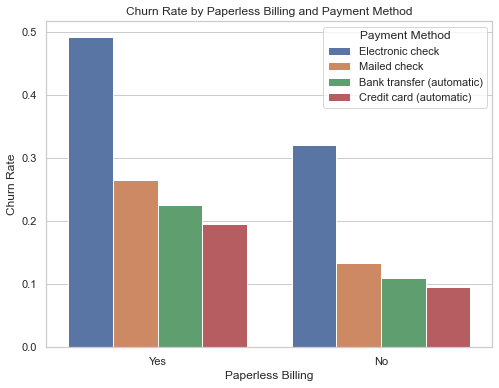

In [138]:
# Create a grouped bar plot to compare churn rate for different paperless billing and payment methods
plt.figure(figsize=(8, 6))
sns.barplot(x='PaperlessBilling', y='Churn', hue='PaymentMethod', data=Telco_churn_copy2, ci=None)
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Paperless Billing and Payment Method')
plt.legend(title='Payment Method', loc='upper right')
plt.show()


Based on the graph, it is evident that customers who opt for paperless billings and pay through electronic checks experience a higher churn rate compared to those using credit cards, which have the lowest churn rate. Similarly, customers who don't use paperless billings and pay via electronic checks also exhibit a higher churn rate than those using credit cards. Moreover, among customers using electronic checks, those who prefer paperless billings churn more frequently than those who don't opt for paperless billing. 

In conclusion, the telecommunication company should focus on promoting paperless billing with credit cards and enhancing the electronic check experience as key measures to mitigate the issue of high churn rate.

#### **Question 7:** Is there a correlation between senior citizens and churn?

In [139]:
# Create a contingency table of 'SeniorCitizen' and 'Churn'
contingency_table_senior = pd.crosstab(Telco_churn_copy2['SeniorCitizen'], Telco_churn_copy2['Churn'])


In [140]:
# Perform the Chi-Square test
chi2_senior, p_value_senior, dof_senior, expected_senior = chi2_contingency(contingency_table_senior)


In [141]:
# Create a DataFrame for the expected frequencies table
expected_df_senior = pd.DataFrame(expected_senior, index=['Not Senior Citizen', 'Senior Citizen'], columns=['Churn=No', 'Churn=Yes'])


In [142]:
# Convert the p-value from scientific notation to normal form and round to 4 decimal places
p_value_senior = "{:.4f}".format(p_value_senior)


In [143]:
# Print the results
print("Chi-Square Statistic:", chi2_senior)
print("P-value:", p_value_senior)
print("Degrees of Freedom:", dof_senior)

# Print the expected frequencies table
print("\nExpected Frequencies Table:")
print(expected_df_senior)


Chi-Square Statistic: 112.38513864964213
P-value: 0.0000
Degrees of Freedom: 1

Expected Frequencies Table:
                       Churn=No    Churn=Yes
Not Senior Citizen  3104.970851  1119.029149
Senior Citizen       602.029149   216.970851


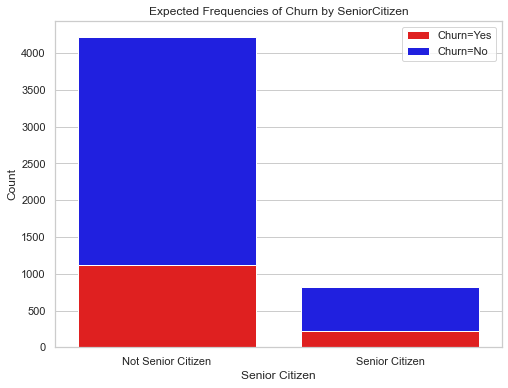

In [144]:
# Visualize the expected frequencies table
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=expected_df_senior.index, y=expected_df_senior['Churn=Yes'], color='red', label='Churn=Yes')
sns.barplot(x=expected_df_senior.index, y=expected_df_senior['Churn=No'], color='blue', bottom=expected_df_senior['Churn=Yes'], label='Churn=No')

# Add labels and title
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Expected Frequencies of Churn by SeniorCitizen')
plt.legend()

# Show the plot
plt.show()


There is a significant relationship between being a Senior Citizen and Churn. The p-value of 0.000 is less than the significance value, indicating that the association is not likely due to chance. Therefore, being a Senior Citizen has a significant impact on customer churn.

For the "Not Senior Citizen" group the expected count for no Churn is approximately 3105 and Churn is approximately 1119. For the "Senior Citizen" group the expected count for no Churn is approximately 602 and Churn is approximately 217. The expected freqencies between senior citizens and non senior citizen with respect to churn are not equal which indicates that being a Senior Citizen has a significant impact on churn.

## Feature Selection
The best features will be selected for our alogorithm.We will use phi-k correlation which is an extension of phi correlation. It returns a matrix of correlation values between the categorical variables. The higher the value, the stronger the association between the variables.


In [145]:
##### Telco churn will be used for the modeling

In [146]:
# Calculate Phi-K correlation
phi_k_corr_matrix = Telco_churn.phik_matrix()
phi_k_corr = phi_k_corr_matrix["Churn"]


interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [147]:
#sort the values
print("Phi-K Correlation:")
phi_sort=phi_k_corr.sort_values()
phi_sort

Phi-K Correlation:


gender              0.000000
PhoneService        0.000000
MultipleLines       0.021454
StreamingMovies     0.139686
StreamingTV         0.140411
DeviceProtection    0.171608
OnlineBackup        0.179415
InternetService     0.203183
OnlineSecurity      0.212458
TechSupport         0.213905
Partner             0.218391
SeniorCitizen       0.231355
Contract            0.256772
Dependents          0.264702
TotalCharges        0.276629
PaperlessBilling    0.297631
MonthlyCharges      0.370836
PaymentMethod       0.434823
tenure              0.471130
Churn               1.000000
Name: Churn, dtype: float64

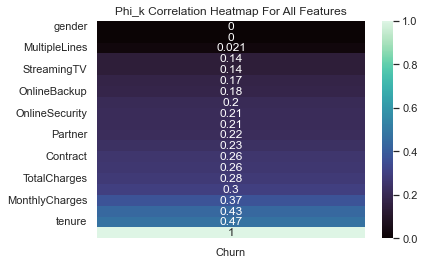

In [148]:
# Create a  phi-k correlation heatmap
sns.heatmap(phi_sort.to_frame(), annot=True, cmap='mako')
plt.title("Phi_k Correlation Heatmap For All Features")
plt.show()

Our correlation matrix has enabled us select the best features.Here we will drop colums with a correlation less than 0.1 namely:
 * Gender
 * Phone Service
 * MultipleLines

In [149]:
## drop columns
Telco_churn= Telco_churn.drop(["gender", "PhoneService", "MultipleLines"], axis= 1)

In [150]:
##since we know the irrelevant columns,we will also drop it in our test set
test_set= test_set.drop(["gender", "PhoneService", "MultipleLines"], axis= 1)

In [151]:
#view data
Telco_churn.head()

SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity  \
0              0     Yes         No       1             DSL             No   
1              0      No         No      34             DSL            Yes   
2              0      No         No       2             DSL            Yes   
3              0      No         No      45             DSL            Yes   
4              0      No         No       2     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check       29.850000   
1        One year               No               Mailed check       56.950001   
2  Month-to-month              Yes               Mailed check       53.849998   
3        One year               No  Bank transfer (automatic)       42.299999   
4  Month-to-month              Yes           Electronic check       70.699997   

   TotalCharges Churn  
0     29.850000    No  
1   1889.500000    No  
2    108.150002   Yes  
3   1840.750000    No  
4    151.649994   Yes

## Modelling

## 1 Data Splitting

#### Splitting our main data into training and evaluation

In [152]:
## create features and label
X= Telco_churn.drop("Churn", axis=1)
y= Telco_churn.Churn

In [153]:
#view our features
X.head()

SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity  \
0              0     Yes         No       1             DSL             No   
1              0      No         No      34             DSL            Yes   
2              0      No         No       2             DSL            Yes   
3              0      No         No      45             DSL            Yes   
4              0      No         No       2     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check       29.850000   
1        One year               No               Mailed check       56.950001   
2  Month-to-month              Yes               Mailed check       53.849998   
3        One year               No  Bank transfer (automatic)       42.299999   
4  Month-to-month              Yes           Electronic check       70.699997   

   TotalCharges  
0     29.850000  
1   1889.500000  
2    108.150002  
3   1840.750000  
4    151.649994

In [154]:
#view our label
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [155]:
#we unpack the data and split it into training and test sets

# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4034, 16)
X_test shape: (1009, 16)
y_train shape: (4034,)
y_test shape: (1009,)


In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 2175 to 31
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     4034 non-null   int64  
 1   Partner           4034 non-null   object 
 2   Dependents        4034 non-null   object 
 3   tenure            4034 non-null   int64  
 4   InternetService   4034 non-null   object 
 5   OnlineSecurity    4034 non-null   object 
 6   OnlineBackup      4034 non-null   object 
 7   DeviceProtection  4034 non-null   object 
 8   TechSupport       4034 non-null   object 
 9   StreamingTV       4034 non-null   object 
 10  StreamingMovies   4034 non-null   object 
 11  Contract          4034 non-null   object 
 12  PaperlessBilling  4034 non-null   object 
 13  PaymentMethod     4034 non-null   object 
 14  MonthlyCharges    4034 non-null   float64
 15  TotalCharges      4034 non-null   float64
dtypes: float64(2), int64(2), object(12)
memor

In [157]:
# Create a LabelEncoder instance
LE = LabelEncoder()

In [158]:
# Convert the categorical label to numeric
num_y_train = LE.fit_transform(y_train)##fit and transform train data
num_y_test= LE.transform(y_test)##transform test data

### Step 2: Creating Our Attributes

In [159]:
# Identify categorical columns excluding "Churn"
cat_cols = Telco_churn.drop(columns=["Churn"]).select_dtypes(include=['object']).columns

num_cols = Telco_churn.select_dtypes(include=['number']).columns

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


### Step 3: Creating Pipeline

#### Creating numeric pipeline



##### For our numeric values, we need to:

- Scale since our monthly transaction and total transaction are of different magnitudes and also since we will be using models sensitive to unscaled values.



##### For our categorical 

- We will need to transform our categorical features to numeric using a onehotencoder
- We will also handle data imbalance using Sklearns class_balance

In [160]:
# we create a numerical and categorical pipeline 
num_pipeline= Pipeline([("scaler", StandardScaler())])

cat_pipeline= Pipeline([("one_hot", OneHotEncoder())])

In [161]:
#we are combine our numeric and categorical pipelines with a Columntransformer
col_pipe= ColumnTransformer([("num_pipe", num_pipeline, num_cols),("cat_pipe", cat_pipeline, cat_cols)])


#### Since our classification problem is binary we will use models designated for binary classification namely:
* LogisticRegression Classifier
* DecisionTree Classifier
* RandomForest Classifier
* Gradient Boosting (XGBoost)
* Support Vector Machines (SVM)

**Logistic Regression:** It's a simple and interpretable algorithm that works well for binary classification tasks like churn prediction. It's a good starting point and can provide insights into feature importance.

**Decision Tree:** Decision trees are simple yet powerful models that recursively split the data based on the most informative features. They are easy to interpret and can capture non-linear relationships. 

**Random Forest:** This ensemble algorithm combines multiple decision trees to improve predictive accuracy and control overfitting. It can handle non-linear relationships and interactions in the data.

**XGBoost:** A gradient boosting algorithm that's known for its performance and flexibility. It often performs well out of the box and handles missing values and non-linearity effectively.

**Support Vector Machines (SVM):** SVMs are good for handling high-dimensional data and can capture complex relationships between features. They work particularly well when there's a clear separation between classes.

# Creating piplelines for each classifier

### LogisticRegression Classifier

In [162]:
#create pipleline for model
log_P= Pipeline([("coltrans", col_pipe), ("model", LogisticRegression(random_state= 100))])

In [163]:
#fit the model
log_P.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression(random_state=100))])

In [164]:
#predict on test data
result_1= log_P.predict(X_test)


In [165]:
#model evaluation
print(classification_report(num_y_test,result_1))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.63      0.58      0.61       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.74      1009
weighted avg       0.79      0.80      0.80      1009



#### DecisionTree CLassifier


In [166]:
#create pipleline for model
d_tree= Pipeline([("coltrans", col_pipe), ("model", DecisionTreeClassifier(random_state= 100))])


In [167]:
#fit the model
d_tree.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=100))])

In [168]:
#predict on test data
result_2= d_tree.predict(X_test)


In [169]:
#model evaluation
print(classification_report(num_y_test,result_2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       742
           1       0.48      0.55      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.74      0.72      0.73      1009



#### Random Forest pipeline

In [170]:
#create pipleline for model
RFP= Pipeline([("coltrans", col_pipe), ("model", RandomForestClassifier(random_state= 100))])


In [171]:
#fit the model
RFP.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=100))])

In [172]:
#predict on test data
result_3= RFP.predict(X_test)

In [173]:
#model evaluation
print(classification_report(num_y_test,result_3))



              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.60      0.52      0.56       267

    accuracy                           0.78      1009
   macro avg       0.72      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009



#### XGBoost Pipeline

In [174]:
#create pipleline for model
XGP= Pipeline([("coltrans", col_pipe), ("model", XGBClassifier(random_state= 100))])


In [175]:
#fit the model
XGP.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProte...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=

In [176]:
#predict on test data
result_4= XGP.predict(X_test)


In [177]:
#model evaluation
print(classification_report(num_y_test,result_4))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.52      0.55       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009



#### SVM Pipeline

In [178]:
#create pipleline for model
SVP= Pipeline([("coltrans", col_pipe), ("model", SVC(random_state= 100))])


In [179]:
#fit the model
SVP.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=100))])

In [180]:
#predict on test data
result_5= SVP.predict(X_test)

In [181]:
#model evaluation
print(classification_report(num_y_test,result_5))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       742
           1       0.65      0.52      0.58       267

    accuracy                           0.80      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.79      0.80      0.79      1009



## Results after modeling

In [182]:
## After modeling we get these results
results={"log_P": result_1, "d_tree":result_2, "RFP": result_3, "XGP": result_4, "SVP":result_5}
  
for key,value in results.items():
    print(f"The performance of {key} is: \n\n", classification_report(num_y_test, value))  

The performance of log_P is: 

               precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.63      0.58      0.61       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.74      1009
weighted avg       0.79      0.80      0.80      1009

The performance of d_tree is: 

               precision    recall  f1-score   support

           0       0.83      0.78      0.81       742
           1       0.48      0.55      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.74      0.72      0.73      1009

The performance of RFP is: 

               precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.60      0.52      0.56       267

    accuracy                           0.78      1009
   macro avg       0.72      0.70

### Notes After Baseline Modeling:

- All our models did relatively well in predicting non-churners or the No or 0 class 

however, for the "Yes" class:

- Logistic regression did quite well in predicting  non-churners

- Whiles SVM had the highest precision for the "Yes" class

##### We will like to handle the imbalance in our dataset

### Handling Imbalance


Regarding the Churn column, the data is imbalance such that the majority class are those who who did not churn and the minority class are those who churn. This can lead to models that are biased towards the majority class, resulting in poor performance for the minority class. To address this issue, various techniques can be used to rebalance the class distribution and improve the model's performance on the minority class.

Here,we will use techniques used to address class imbalance in machine learning.These techniques include:
- class weights
- SMOTE (Synthetic Minority Over-sampling Technique)

### Using Class_Weight to Handle imbalance

In [183]:
## for class weight i will use CW

In [184]:
## intialize class weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=num_y_train)

In [185]:
# Assign our weight to our class
weight= dict(zip([0, 1], class_weights))
print(weight)

{0: 0.6802698145025295, 1: 1.8868101028999065}


#### Logistic Regression with Class Weight


In [186]:
#create classweight for model
log_P_CW= Pipeline([("coltrans", col_pipe), ("model", LogisticRegression(random_state= 100,class_weight=weight))])


In [187]:
#fit the model
log_P_CW.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight={0: 0.6802

In [188]:
#predict on test data
result_6= log_P_CW.predict(X_test)

In [189]:
#model evaluation
print(classification_report(num_y_test, result_6))

              precision    recall  f1-score   support

           0       0.91      0.70      0.80       742
           1       0.50      0.82      0.62       267

    accuracy                           0.73      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.73      0.75      1009



#### Decision Tree with class weight

In [190]:
#create classweight for model
d_tree_CW= Pipeline([("coltrans", col_pipe), ("model", DecisionTreeClassifier(random_state= 100,class_weight=weight))])


In [191]:
#fit the model
d_tree_CW.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(class_weight={0: 0.

In [192]:
#predict on test data
result_7= d_tree_CW.predict(X_test)


In [193]:
#model evaluation
print(classification_report(num_y_test, result_7))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       742
           1       0.50      0.57      0.53       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.67      1009
weighted avg       0.75      0.74      0.74      1009



#### Random Forest Class Weight

In [194]:
#create classweight for model
RFP_CW= Pipeline([("coltrans", col_pipe), ("model", RandomForestClassifier(random_state= 100,class_weight=weight))])


In [195]:
#fit the model
RFP_CW.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.

In [196]:
#predict on test data
result_8= RFP_CW.predict(X_test)


In [197]:
#model evaluation
print(classification_report(num_y_test, result_8))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       742
           1       0.61      0.52      0.56       267

    accuracy                           0.78      1009
   macro avg       0.72      0.70      0.71      1009
weighted avg       0.77      0.78      0.78      1009



#### XGBoost with Class Weights

In [198]:
# Set "scale_pos_weight" based on class balance


### Scale_pos_weight is the parameter you set to the ratio of the number of negative examples to the number of positive examples

In [199]:
#we divide majority vs minority class
pos_weight = (sum(Telco_churn["Churn"]== "No"))/(sum(Telco_churn["Churn"]== "Yes"))

In [200]:
#create classweight for model
XGP_CW= Pipeline([("coltrans", col_pipe), ("model", XGBClassifier(random_state= 100,scale_pos_weight=pos_weight))])


In [201]:
#fit the model
XGP_CW.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProte...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=

In [202]:
#predict on test data
result_9= XGP_CW.predict(X_test)


In [203]:
#model evaluation
print(classification_report(num_y_test, result_9))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       742
           1       0.52      0.65      0.58       267

    accuracy                           0.75      1009
   macro avg       0.69      0.72      0.70      1009
weighted avg       0.77      0.75      0.76      1009



#### SVM with Class Weights

In [204]:
#create classweight for model
SVP_CW= Pipeline([("coltrans", col_pipe), ("model", SVC(random_state= 100,class_weight=weight))])


In [205]:
#fit the model
SVP_CW.fit(X_train, num_y_train)


Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 SVC(class_weight={0: 0.6802698145025295,
 

In [206]:
#predict on test data
result_10= SVP_CW.predict(X_test)


In [207]:
#model evaluation
print(classification_report(num_y_test,result_10))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       742
           1       0.50      0.77      0.60       267

    accuracy                           0.73      1009
   macro avg       0.70      0.74      0.70      1009
weighted avg       0.79      0.73      0.75      1009



In [208]:
## After modeling with class weight we get these results
results_cw={"logistic Regression": result_1,"Logistic Regression_CW":result_6,"decision tree":result_2,"decision tree_CW":result_7,"Random Forest": result_3,"Random Forest_CW": result_8,"XGB": result_4,"XGB_CW": result_9,"SVM":result_5,"SVM_CW":result_10}
  
for key,value in results_cw.items():
    print(f"The performance of {key} is: \n\n", classification_report(num_y_test, value))  

The performance of logistic Regression is: 

               precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.63      0.58      0.61       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.74      1009
weighted avg       0.79      0.80      0.80      1009

The performance of Logistic Regression_CW is: 

               precision    recall  f1-score   support

           0       0.91      0.70      0.80       742
           1       0.50      0.82      0.62       267

    accuracy                           0.73      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.73      0.75      1009

The performance of decision tree is: 

               precision    recall  f1-score   support

           0       0.83      0.78      0.81       742
           1       0.48      0.55      0.51       267

    accuracy                           0.72    

#### Notes: 

- After adding class weights, our models performed better in terms of improvement in the yes class predictions.There was an increase in the recall for the yes class, which means the model is good at predicting good positive instances hence less false negatives.

- Again SVM and Logistic Regression topped the charts. However, it is worth noting that while the recall of the Yes class increased, the precision decreased, and this is a normal thing thanks to recall-precision trade off

- overall, adding class weights improved the performance of the model for both classes as opposed to not using weights 

### Dealing with imbalance using SMOTE

In [209]:
## for smote i will use SM

#### SMOTE with LogisticRegression

In [210]:
# Fit and transform the ColumnTransformer on the training data 
X_train_transformed = col_pipe.fit_transform(X_train) 

#  Transform the test data using the pre-fitted ColumnTransformer
X_test_transformed = col_pipe.transform(X_test)


In [211]:
# Apply SMOTE to the transformed training data and target variable
smote = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, num_y_train)


In [212]:
# Create the final pipeline with SMOTE and LogisticRegression
LGR_SM = Pipeline([
    ("model", LogisticRegression(random_state=100))
])

In [213]:
# Fit the pipeline on your resampled data
LGR_SM.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('model', LogisticRegression(random_state=100))])

In [214]:
# Now you can use the fitted pipeline for predictions and evaluation
result_11 = LGR_SM.predict(X_test_transformed)


In [215]:
# Perform a classification report
print(classification_report(num_y_test, result_11))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.50      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.75      1009



#### SMOTE with DecisionTree

In [216]:
# Create the final pipeline with SMOTE and DecisionTreeClassifier
Dtree_SM = Pipeline([
    ("model", DecisionTreeClassifier(random_state=100))
])


In [217]:
# Fit the pipeline on your resampled data
Dtree_SM.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('model', DecisionTreeClassifier(random_state=100))])

In [218]:
# Now you can use the fitted pipeline for predictions and evaluation
result_12 = Dtree_SM.predict(X_test_transformed)


In [219]:
# Perform a classification report
print(classification_report(num_y_test, result_12))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       742
           1       0.49      0.61      0.55       267

    accuracy                           0.73      1009
   macro avg       0.67      0.69      0.68      1009
weighted avg       0.75      0.73      0.74      1009



#### SMOTE with Random Forest

In [220]:
# Create the final pipeline with SMOTE and RandomForestClassifier
RF_SM =Pipeline([
    ("model", RandomForestClassifier(random_state=100))
])



In [221]:
# Fit the pipeline on your resampled data
RF_SM.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('model', RandomForestClassifier(random_state=100))])

In [222]:
# Now you can use the fitted pipeline for predictions and evaluation
result_13 = RF_SM.predict(X_test_transformed)


In [223]:
# Perform a classification report
print(classification_report(num_y_test, result_13))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       742
           1       0.56      0.60      0.58       267

    accuracy                           0.77      1009
   macro avg       0.71      0.72      0.71      1009
weighted avg       0.78      0.77      0.77      1009



#### SMOTE with XGBOOST

In [224]:
# Create the final pipeline with SMOTE and XGBClassifier
XGB_SM = Pipeline([
    ("model", XGBClassifier(random_state=100))
])


In [225]:
# Fit the pipeline on your resampled data
XGB_SM.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_pa

In [226]:
# Now you can use the fitted pipeline for predictions and evaluation
result_14 = XGB_SM.predict(X_test_transformed)


In [227]:
# Perform a classification report
print(classification_report(num_y_test, result_14))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       742
           1       0.57      0.63      0.60       267

    accuracy                           0.78      1009
   macro avg       0.72      0.73      0.72      1009
weighted avg       0.78      0.78      0.78      1009



#### SMOTE with SVM


In [228]:
# Create the final pipeline with SMOTE and LogisticRegression
SVM_SM = Pipeline([
    ("model", SVC(random_state=100))
])

In [229]:
# Fit the pipeline on your resampled data
SVM_SM.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('model', SVC(random_state=100))])

In [230]:
# Now you can use the fitted pipeline for predictions and evaluation
result_15 = SVM_SM.predict(X_test_transformed)


In [231]:
# Perform a classification report
print(classification_report(num_y_test, result_15))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       742
           1       0.53      0.74      0.61       267

    accuracy                           0.75      1009
   macro avg       0.71      0.75      0.72      1009
weighted avg       0.79      0.75      0.77      1009



In [232]:
## After modeling with class weight we get these results
results_SM={"Logistic Regression_CW":result_6,"Logistic Regression_SM":result_11,"decision tree_CW":result_7,"decision tree_SM":result_12,"Random Forest_CW":result_8,"Random Forest_SM":result_13,"XGB_CW": result_9,"XGB_SM": result_14,"SVM_CW":result_10,"SVM_SM":result_15}
  
for key,value in results_SM.items():
    print(f"The performance of {key} is: \n\n", classification_report(num_y_test, value))  

The performance of Logistic Regression_CW is: 

               precision    recall  f1-score   support

           0       0.91      0.70      0.80       742
           1       0.50      0.82      0.62       267

    accuracy                           0.73      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.73      0.75      1009

The performance of Logistic Regression_SM is: 

               precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.50      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.75      1009

The performance of decision tree_CW is: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82       742
           1       0.50      0.57      0.53       267

    accuracy                           0.

#### Notes: 

- After adding SMOTE, our models performed better in terms of improvement in the yes class predictions.There was an increase in the recall for the yes class, which means the model is good at predicting good positive instances hence less false negatives.

- Again SVM and Logistic Regression topped the charts. However, it is worth noting that while the recall of the Yes class increased, the precision decreased, and this is a normal thing thanks to recall-precision trade off

- overall, adding SMOTE improved the performance of the model for both classes as opposed to not using SMOTE

### Comparing the combination of results of Class_weight vs SMOTE vs Baseline

Note _SM is for smote and _CW is for classweight

In [233]:
## create a dictionary for all the models 
imbalance_baseline_result= {"logistic Regression": result_1,"Logistic Regression_CW":result_6,"Logistic Regression_SM":result_11,"decision tree":result_2,"decision tree_CW":result_7,"decision tree_SM":result_12,"Random Forest": result_3,"Random Forest_CW": result_8,"Random Forest_SM":result_13,"XGB": result_4,"XGB_CW": result_9,"XGB_SM": result_14,"SVM":result_5,"SVM_CW":result_10,"SVM_SM":result_15}

for key, value in imbalance_baseline_result.items():
  
    
  print(f"Classification Report for {key}, is: \n\n",(classification_report(num_y_test,value)))

Classification Report for logistic Regression, is: 

               precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.63      0.58      0.61       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.74      1009
weighted avg       0.79      0.80      0.80      1009

Classification Report for Logistic Regression_CW, is: 

               precision    recall  f1-score   support

           0       0.91      0.70      0.80       742
           1       0.50      0.82      0.62       267

    accuracy                           0.73      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.73      0.75      1009

Classification Report for Logistic Regression_SM, is: 

               precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.50      0.80      0.62       267

    accuracy  

### Comparing the combination of results of Class_weight vs SMOTE 

In [234]:
# create a dictionary for all the models 
balance_result= {"Logistic Regression_CW":result_6,"Logistic Regression_SM":result_11,"decision tree_CW":result_7,"decision tree_SM":result_12,"Random Forest_CW": result_8,"Random Forest_SM":result_13,"XGB_CW": result_9,"XGB_SM": result_14,"SVM_CW":result_10,"SVM_SM":result_15}

for key, value in balance_result.items():
  
    
  print(f"Classification Report for {key}, is: \n\n",(classification_report(num_y_test,value)))

Classification Report for Logistic Regression_CW, is: 

               precision    recall  f1-score   support

           0       0.91      0.70      0.80       742
           1       0.50      0.82      0.62       267

    accuracy                           0.73      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.73      0.75      1009

Classification Report for Logistic Regression_SM, is: 

               precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.50      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.75      1009

Classification Report for decision tree_CW, is: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82       742
           1       0.50      0.57      0.53       267

    accuracy     

### Create a table to compare the important metrics of our balanced models

In [235]:
 #Create lists to store data
classifiers = []
precisions = []
accuracies = []
recalls = []
f1_scores = []
f2_scores = []


In [236]:
# Populate the lists with data
for key, value in balance_result.items():
    report = classification_report(num_y_test, value, output_dict=True)
    f2 = fbeta_score(num_y_test, value, beta=2)
    
    classifiers.append(key)
    precisions.append(report["weighted avg"]["precision"])
    accuracies.append(report["accuracy"])
    recalls.append(report["weighted avg"]["recall"])
    f1_scores.append(report["weighted avg"]["f1-score"])
    f2_scores.append(f2)

In [237]:
# Create a DataFrame
data = {
    "Classifier": classifiers,
    "Precision": precisions,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1-Score": f1_scores,
    "F2-Score": f2_scores
}

df = pd.DataFrame(data)


In [238]:
#Sort the DataFrame based on desired metrics
sorted_df = df.sort_values(by=["Precision","Accuracy","F1-Score","Recall","F2-Score"], ascending=False)
sorted_df = sorted_df.reset_index(drop=True)


In [239]:
# Print the sorted DataFrame
(sorted_df)

Classifier  Precision  Accuracy    Recall  F1-Score  F2-Score
0  Logistic Regression_CW   0.804392  0.734390  0.734390  0.749278  0.724252
1  Logistic Regression_SM   0.802315  0.739346  0.739346  0.753538  0.717158
2                  SVM_SM   0.794072  0.754212  0.754212  0.765365  0.685121
3                  SVM_CW   0.790677  0.733399  0.733399  0.747431  0.692568
4                  XGB_SM   0.784158  0.777007  0.777007  0.780083  0.613971
5        Random Forest_SM   0.775257  0.770069  0.770069  0.772407  0.591279
6        Random Forest_CW   0.774941  0.783944  0.783944  0.778033  0.532819
7                  XGB_CW   0.772300  0.751239  0.751239  0.758850  0.618741
8        decision tree_SM   0.753656  0.730426  0.730426  0.738979  0.585296
9        decision tree_CW   0.748341  0.736373  0.736373  0.741421  0.554340

## Reason for choosing model
The F2-score is a metric used to evaluate the performance of a classification model. It is a variant of the F1-score that places more emphasis on the model's ability to correctly classify positive examples (i.e., the "positive class") while still considering precision and recall.

The F1-score is a commonly used metric in classification tasks to assess the balance between precision and recall of a model's predictions.

Accuracy measures the ratio of correctly predicted observations to the total observations. However, accuracy can be misleading in imbalanced datasets.

Precision measures the ratio of correctly predicted positive observations to the total predicted positives. A higher precision indicates a lower rate of false positives.


Based on these metrics observed,we will take the model with a higher precision and f2 score.From our comparison,we observed logisticRegression with class weight which is Logistic Regression_CW has the highest precision and f2.Therefore this model will be used.

### Confusion Matrix for choosen model


A confusion matrix is a tabular representation of the performance of a classification model. It helps in understanding the accuracy and error types of the model's predictions by comparing the predicted labels with the actual labels. 

In [240]:
# Create a confusion matrix
conf_matrix = confusion_matrix(num_y_test, result_6)


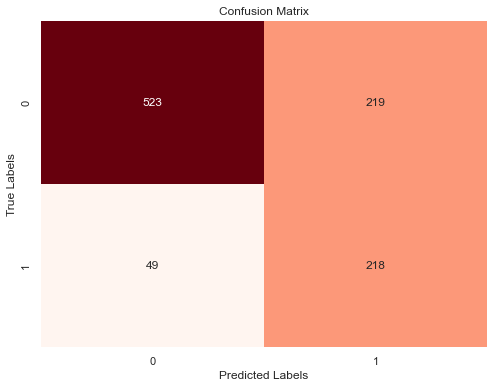

In [241]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

A high True Negative(TN) count means that the model is successfully identifying customers who are likely to remain with the company

### Explaination of confusion matrix
The heatmap visualization of the confusion matrix provides a clear overview of these values. The cells along the diagonal represent the true positive and true negative predictions, while off-diagonal cells represent the false positive and false negative predictions.

#### In the heatmap:

The brighter the color, the higher the count of instances.
The diagonal cells (top-left to bottom-right) represent correct predictions.
The off-diagonal cells represent incorrect predictions.

#### Interpreting the heatmap:

* The top-left cell represents true negatives (correctly predicted negatives).
* The top-right cell represents false positives (incorrectly predicted positives).
* The bottom-left cell represents false negatives (incorrectly predicted negatives).
* The bottom-right cell represents true positives (correctly predicted positives).

## Using K-Fold cross validation

In [242]:
# Define the number of folds and other parameters
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=100)

In [243]:
# Evaluate the best model using K-Fold Cross Validation
scores = cross_val_score(log_P_CW, X_train, num_y_train, cv=kf, scoring='accuracy')


In [244]:
# Print the evaluation scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold + 1} Accuracy: {score:.4f}")


Fold 1 Accuracy: 0.7475
Fold 2 Accuracy: 0.7500
Fold 3 Accuracy: 0.7153
Fold 4 Accuracy: 0.7351
Fold 5 Accuracy: 0.7072
Fold 6 Accuracy: 0.7742
Fold 7 Accuracy: 0.7643
Fold 8 Accuracy: 0.7667
Fold 9 Accuracy: 0.7866
Fold 10 Accuracy: 0.7643


In [245]:
#Print the average score across all folds
print(f"Average Accuracy: {scores.mean():.4f}")


Average Accuracy: 0.7511


The average accuracy of your model across the 10 folds of the K-Fold Cross Validation is approximately 75.11%. This value represents the overall performance of the model in predicting churn or not churn on different subsets of the training data. It's an important metric to assess the model's generalization ability and its effectiveness in making accurate predictions on unseen data.

### Rationale for Using k-Fold Cross Validation


Cross-validation is used to assess the performance of a model in a more robust way compared to a single train-test split. It helps in reducing the impact of data randomness and provides a more accurate estimate of the model's performance.

By using k-Fold cross-validation, we are able to evaluate the model on different subsets of the data, which helps in detecting potential overfitting or underfitting issues.

The use of 10 folds (num_folds = 10) allows for a good balance between model evaluation and computational efficiency. Ten-fold cross-validation is a commonly used choice in practice

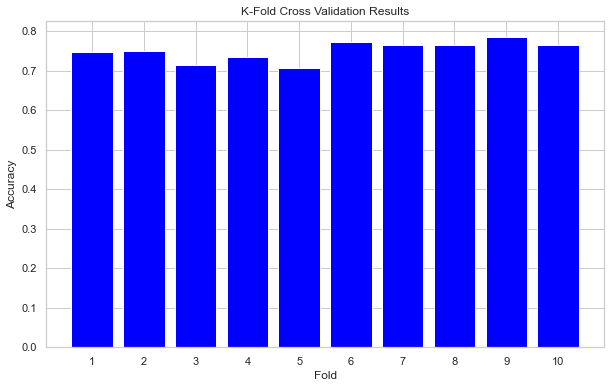

Average Accuracy: 0.7511


In [246]:
# Create a bar plot to visualize the scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_folds + 1), scores, color='blue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Results')
plt.xticks(range(1, num_folds + 1))
plt.show()

# Print the average score across all folds
print(f"Average Accuracy: {scores.mean():.4f}")

The generated bar plot visualizes the results of K-Fold Cross Validation for the model's accuracy.

The graph allows you to observe how the accuracy of the model varies across different folds of the dataset. It provides insights into the consistency of the model's performance and helps identify any potential variations in accuracy across different subsets of the data. The "Average Accuracy" value printed below the graph gives you an overall measure of your model's performance across all folds which is 0.7511%

## Hyperparameter tuning

In [247]:
# Define the parameter grid for grid search
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'],

}


In [248]:
# Create the grid search object
grid_search = GridSearchCV(log_P_CW, param_grid=param_grid, cv=5, scoring='accuracy')


In [249]:
#Perform the grid search:
grid_search.fit(X_train, num_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltrans',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder())]),
                                                                         Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProte

In [250]:
#Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best hyperparameters are:{best_hyperparameters}")
print(f"best score is {best_score}")


best hyperparameters are:{'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
best score is 0.7516110583264919


### Concept for hyperparameter tuning

Hyperparameter tuning, is the process of finding the best values for the hyperparameters of a machine learning model to improve its performance. Hyperparameters are settings or configurations that are not learned directly from the data but have a significant impact on the model's behavior and generalization ability. Tuning these hyperparameters can lead to better model performance and generalization to new, unseen data.

Here's how hyperparameter tuning works and why it's important:

Hyperparameters are set before the training process and control aspects such as the complexity of the model, regularization, learning rate, etc.

#### Importance of Hyperparameter Tuning  :

* Poorly chosen hyperparameters can lead to overfitting
* Hyperparameter tuning helps find the right balance between bias and variance, resulting in a model that generalizes well to new data.

#### Hyperparameter Tuning Process:

* Grid Search: Enumerates all possible combinations of hyperparameters from a predefined grid. It exhaustively searches for the best combination.

* Cross-Validation:Hyperparameter tuning should be performed using cross-validation to ensure the chosen hyperparameters generalize well to unseen data.Typically, a separate validation set or k-fold cross-validation is used to estimate the performance of each set of hyperparameters.

#### Metrics:

The choice of a performance metric (e.g., accuracy, precision, recall, F1-score) is important as it guides the optimization process. The metric should align with the problem's objectives.

#### Hyperparameters to Tune:

Hyperparameters depend on the chosen algorithm. For example, in a logistic regression model, you might tune the regularization strength and type.

#### Interpretation and Validation:

After tuning, it's crucial to evaluate the model on an independent test set to assess its performance in a real-world scenario.

#### Automated Tools:
Many libraries offer tools for hyperparameter tuning, such as scikit-learn's GridSearchCV and RandomizedSearchCV.

In summary, hyperparameter tuning is a crucial step in developing machine learning models that perform well on real-world tasks. It involves systematically searching for the best hyperparameters to strike a balance between bias and variance, resulting in a model that generalizes effectively to new, unseen data.

### Making Future Predictions


After performing hypertuning,we have got the best model which we will use for our prediction.


In [251]:
#### We get the best model
best_model = grid_search.best_estimator_

In [252]:
#view best model
best_model

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=10,
                 

In [254]:
###use best model to predict
final_result= best_model.predict(test_set)

ValueError: could not convert string to float: 'No'

In [ ]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(final_result, columns=["Churn"])


In [ ]:
# Concatenate the original test set and the result DataFrame along the columns
final_test_with_churn= pd.concat([test_set, result_df], axis=1)

In [ ]:
#we view to confirm changes 
final_test_with_churn.head()

In [ ]:
#After concatenating with the original we put it csv
final_test_with_churn.to_csv("final_test_set_churn.csv")


## Key Insights and Conclusion

### Analyzing Customer Churn and Improving Retention Strategies

The analysis of customer churn and the implementation of retention strategies provide valuable insights into understanding customer behavior and enhancing business performance. The following key insights emerged from this analysis:

**Churn Distribution**: The distribution of churned and non-churned customers revealed that a significant proportion of customers did not churn during the observation period. 

**Feature Importance**: Through feature analysis, it was identified that certain factors such as contract type, monthly charges, and tenure play a pivotal role in influencing customer churn. Businesses should focus on these key features when devising retention strategies.

**Imbalanced Data**: The presence of imbalanced data posed a challenge when building predictive models. Addressing this issue with techniques like SMOTE and class weight helped in creating a balanced dataset for training models and improving their performance.

**Model Performance**: Machine learning models, particularly Random Forest and Logistic Regression, demonstrated promising predictive accuracy for customer churn. Hyperparameter tuning and model evaluation were crucial steps in optimizing model performance.

**Retaining Valuable Customers**: By identifying high-value customers who are more likely to churn, businesses can tailor personalized retention offers and interventions. This proactive approach can lead to improved customer loyalty and reduced churn rates.

### Challenges Faced:

**Imbalanced Data**: Dealing with imbalanced data required careful consideration of techniques like SMOTE and class weight to prevent bias and enhance model performance.

**Hyperparameter Tuning**: Optimizing model hyperparameters proved challenging due to the wide range of possible combinations. Grid search and cross-validation were essential for finding the best parameter settings.

**Interpreting Insights**: Interpretability of complex models like Random Forest and Linear Regression posed challenges in understanding the exact relationships between features and churn. Feature importance analysis helped mitigate this issue.

### Way Forward:

**Continuous Monitoring**: Regularly monitoring customer churn patterns and analyzing new data can provide insights into evolving customer behaviors. This enables businesses to adapt retention strategies accordingly.

**Dynamic Offers**: Implementing dynamic and targeted offers based on customer behavior and preferences can enhance customer engagement and reduce churn.

**Predictive Analytics**: Leveraging advanced predictive analytics techniques such as deep learning or ensemble methods can further improve churn prediction accuracy.

**Feedback Loop**: Establishing a feedback loop from customer interactions and outcomes can help refine the models and strategies over time.

**Customer-Centric Approach**: Embracing a customer-centric approach by actively seeking customer feedback, understanding pain points, and tailoring experiences can foster long-term customer relationships.

In conclusion, the analysis of customer churn provides actionable insights to guide businesses in retaining customers and improving overall performance. By leveraging advanced analytics, continuous monitoring, and tailored strategies, businesses can effectively address churn and foster lasting customer loyalty.